## Module: Programming for Data Analysis<br>

## Project: Analysis of a red wine dataset

## Contents

1. [Problem statement](#Problem-statement)<br>
   i. [Requirements](#Requirements)<br>
2. [Method](#Method)<br>
3. [Choose Dataset](#Choose-Dataset)<br>
4. [Import Libraries](#Import-Libraries)<br>
5. [Examine the dataset](#Examine-the-dataset)<br>
    a. [Read in the dataset](#Read-in-the-dataset)<br>
    b. [First five rows](#First-five-rows)<br>
    c. [Last five rows](#Last-five-rows)<br>
    d. [Data types of variables](#Data-types-of-variables)<br>
    e. [Basic statistics](#Basic-statistics)<br>
6. [Format dataset](#Format-dataset)<br>
7. [Visual summary of variables](#Visual-summary-of-variables)<br>
8. [Probability distributions of variables](#Probability-distributions-of-variables)<br>
    a. [Fixed acidity](#Fixed-acidity)<br>
    b. [Volatile acidity](#Volatile-acidity)<br>
    c. [Citric acid](#Citric-acid)<br>
    d. [Residual sugar](#Residual-sugar)<br>
    e. [Chlorides](#Chlorides)<br>
    f. [Free sulfur dioxide](#Free-sulfur-dioxide)<br>
    g. [Total sulfur dioxide](#Total-sulfur-dioxide)<br>
    h. [Density](#Density)<br>
    j. [pH](#pH)<br>
    k. [Sulphates](#)<br>
    l. [Alcohol](#)<br>
    m. [Quality](#Quality)<br>
9. [Variables and quality](#Variables-and-quality)<br>
    a. [Observations of variables versus quality](#Observations-of-variables-versus-quality)<br>
    b. [A different way to observe variables versus quality](#A-different-way-to-observe-variables-versus-quality)<br>
    c. [Correlation between variables and quality](#Correlation-between-variables-and-quality)<br>
19. [Conclusion](#Conclusion)
20. [References](#References)<br>

## Problem statement

Create a data set by simulating a real-world phenomenon of
your choosing.<br> You may pick any phenomenon you wish – you might pick one that is
of interest to you in your personal or professional life.<br> 
Then, rather than collect data
related to the phenomenon, you should model and synthesise such data using Python.

### Requirements

1. Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four different variables. 

2. Investigate the types of variables involved, their likely distributions, and their relationships with each other.

3.  Synthesise/simulate a data set as closely matching their properties as possible.

4.  Detail your research and implement the simulation in a Jupyter notebook – the data set itself can simply be displayed in an output cell within the notebook.

## Method

For this project, a dataset is needed to synthesise the data from. Regardless of what the real-world phenomenon might be, there more than likely will be a dataset related to the phenomenon.
The following process will be used to work through the project.

1. Choose dataset
2. Import all necessary Python libraries for analysis, plotting, etc
3. Examine dataset - variable types, missing rows, etc
4. Format dataset as needed
5. Visual summary of variables - see where the 'bulk' of information is.
6. Determine probability distribution of each variable in the dataset
7. Generate synthetic data from each variable
8. Check synthetic data has the same probability distribution as original data

## Choose Dataset

For this project, the dataset of portuguese red wine will be used - for the simple fact that I like red wine and want to know what makes a good wine.

The dataset will be in a csv (comma-seperated value) format.

## Import Libraries

Import all the libraries needed for the project.

As the data is in tabular format we need:
- Pandas and Numpy for working with tabular data and numerical arrays
- Matplotlib and seaborn for visualising the data
- Distfit or Fitter to determine the probability distribution of variables
- Scipy to generate the synthetic data

In [1]:
import pandas as pd
import numpy as np
from numpy import random

# Import matplotlib and seaborn to visualise data
import matplotlib.pyplot as plt
import seaborn as sns

# distfit is used to find the type of distribution
from distfit import distfit

# Fitter is another library to find the distribution
from fitter import Fitter, get_common_distributions, get_distributions

# scipy to generate synthetic data - import statistics and probability distribution libraries
from scipy.stats import lognorm
from scipy.stats import powerlaw
from scipy.stats import cauchy
from scipy import stats

## Examine the dataset

The dataset is read in, and the data summary observed.
Then the top 10/last 10 rows can be seen, as information about all the data types of each variables, i.e. are they strings, integers, floating-point numbers, etc.

From there, basic statistics can be generated and the dataset can be cleaned up by removing any duplicate or unnecessary columns.

### Read in the dataset

Read in the dataset and see the first five/last five rows.

In [2]:
# Read in the csv file - note that the csv is in the same folder as this notebook
df = pd.read_csv('WineQT.csv')
df

# To-do:
# Run command to check for missing data
# Re-format text above to put in bullet points so that it's easier to read.

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


### First five rows

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


### Last five rows

In [4]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595
1142,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1597


### Data types of variables

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


### Basic statistics

In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


## Format dataset

Drop the Id column as it's not necessary to reference the rows and/or columns.

In [7]:
df = df.drop(columns=['Id'])
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6


## Visual summary of variables

Below, all 12 variables will be plotted. Note how *quality* has been left in, but whilst all the other variables are some type of chemical compound, *quality* is arbitrary and has been determined:
- either manually
- through a relationship or pattern between one or more variables.

In [8]:
wine_variables = df.columns.values.tolist()
wine_variables

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

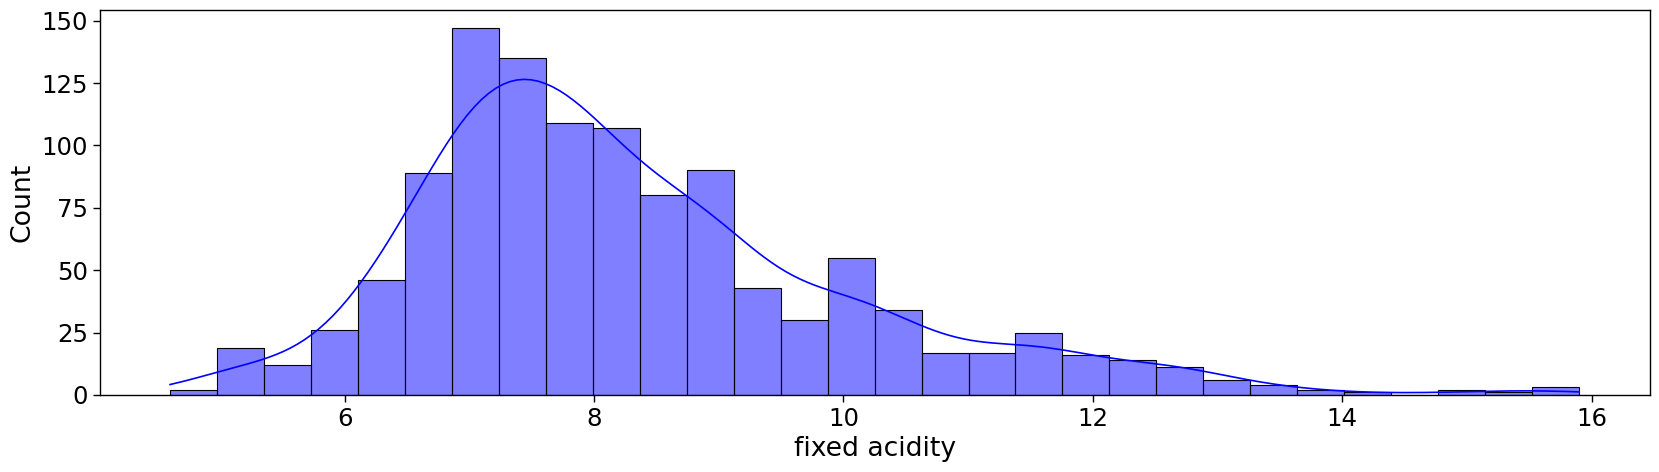

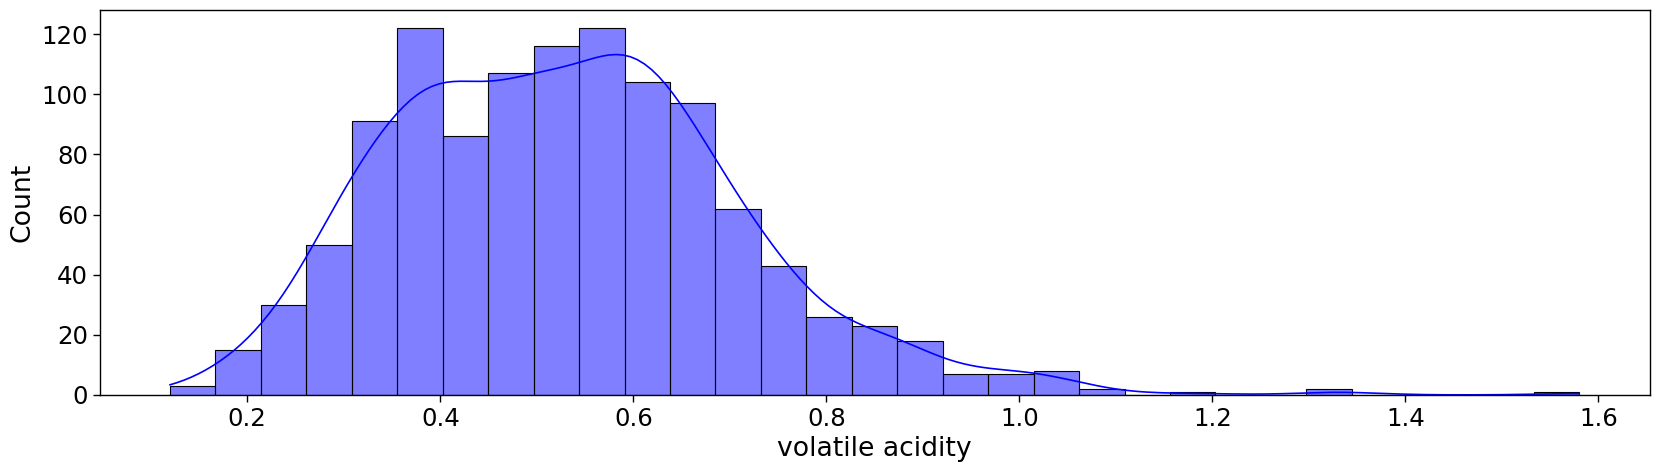

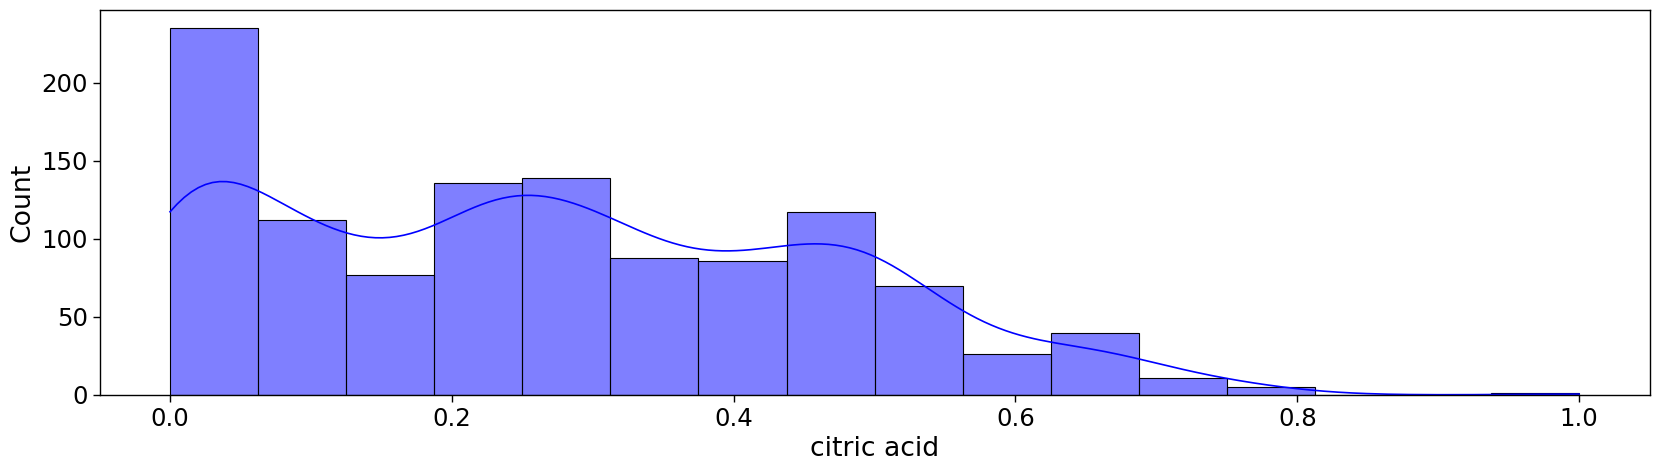

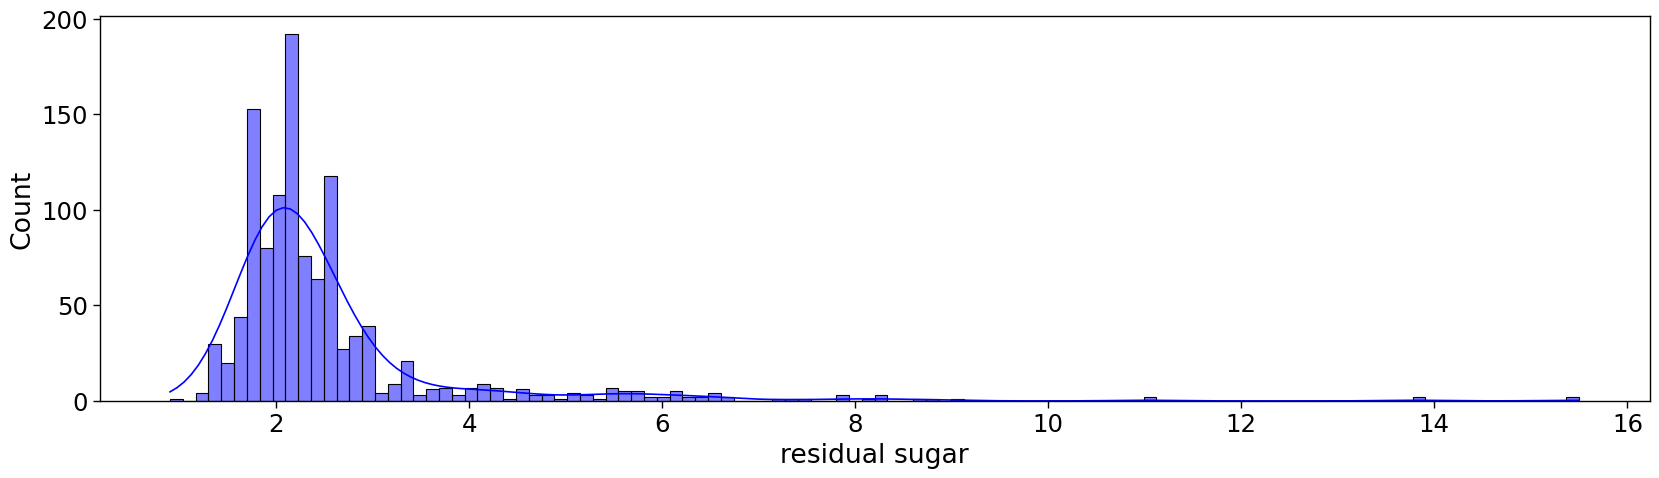

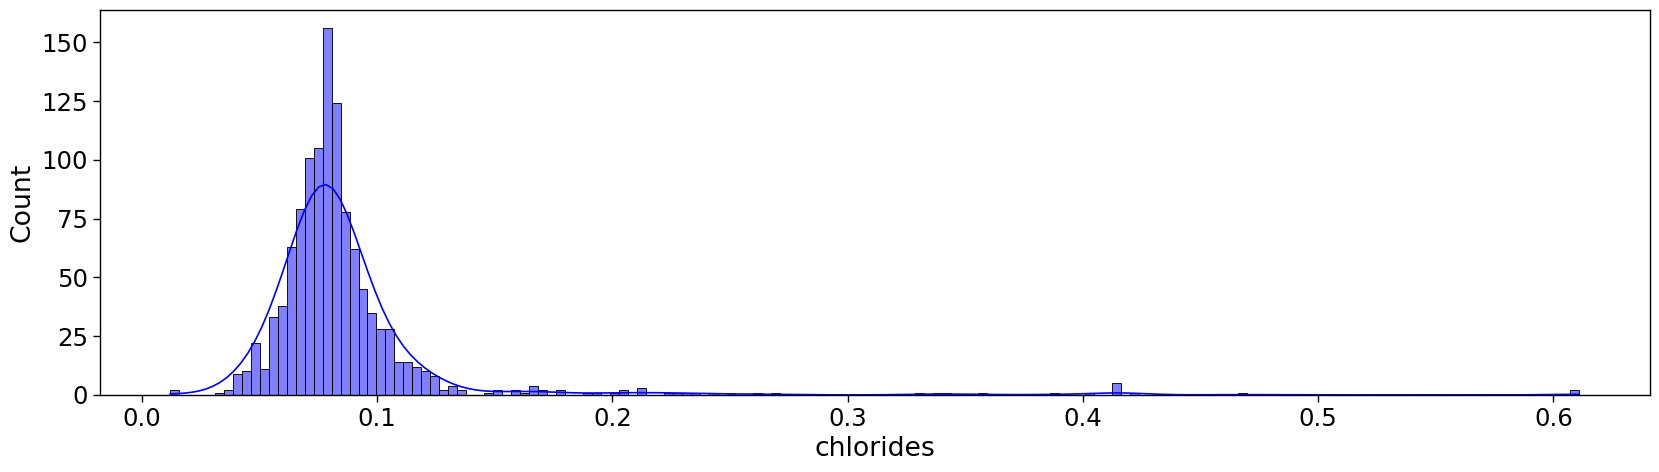

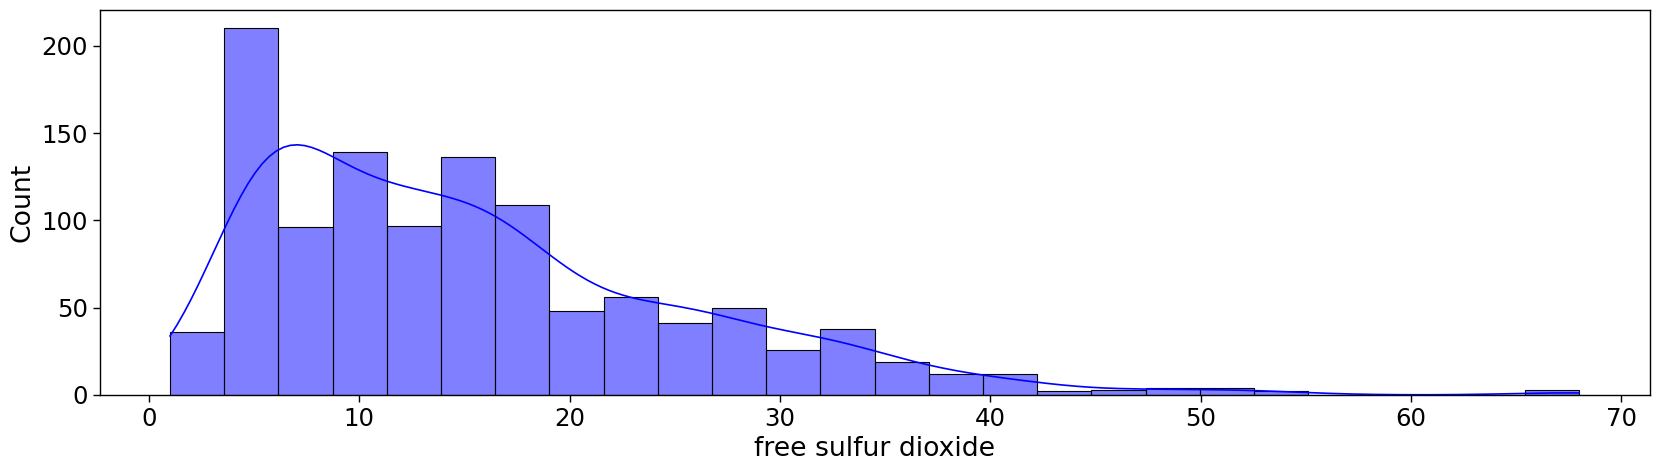

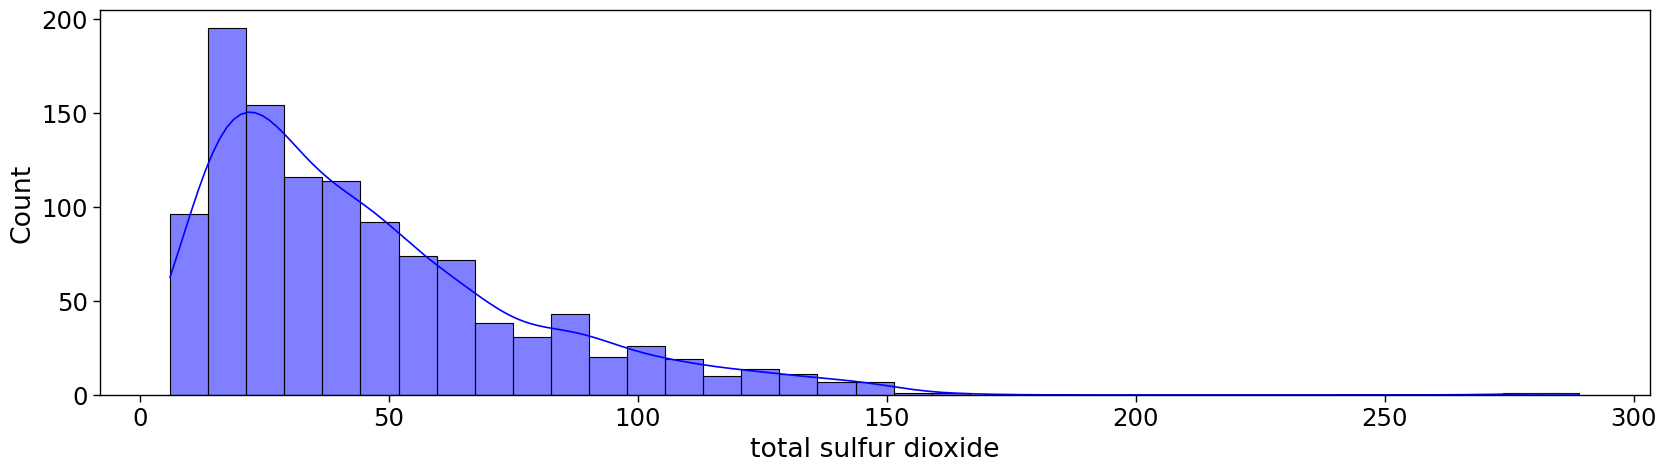

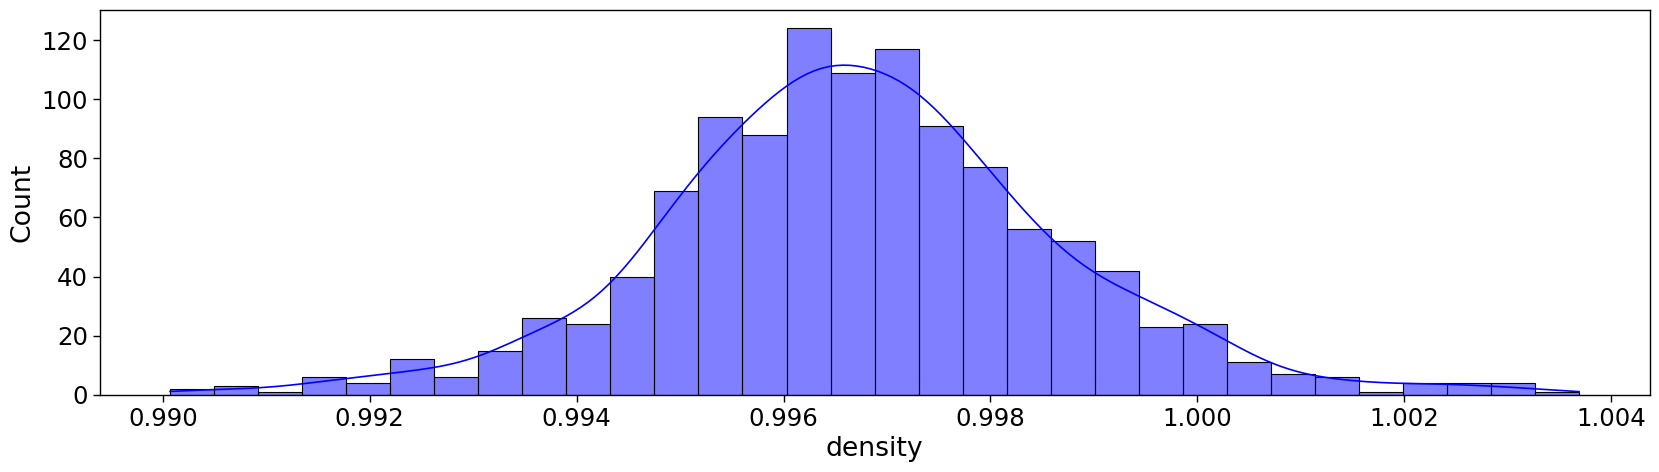

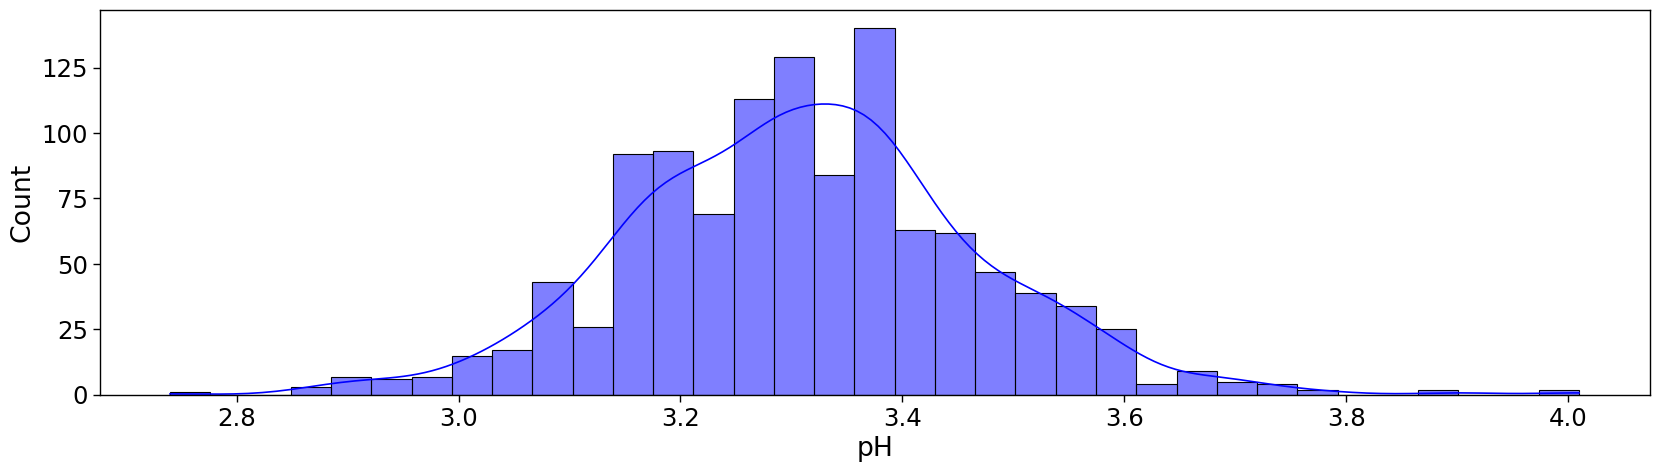

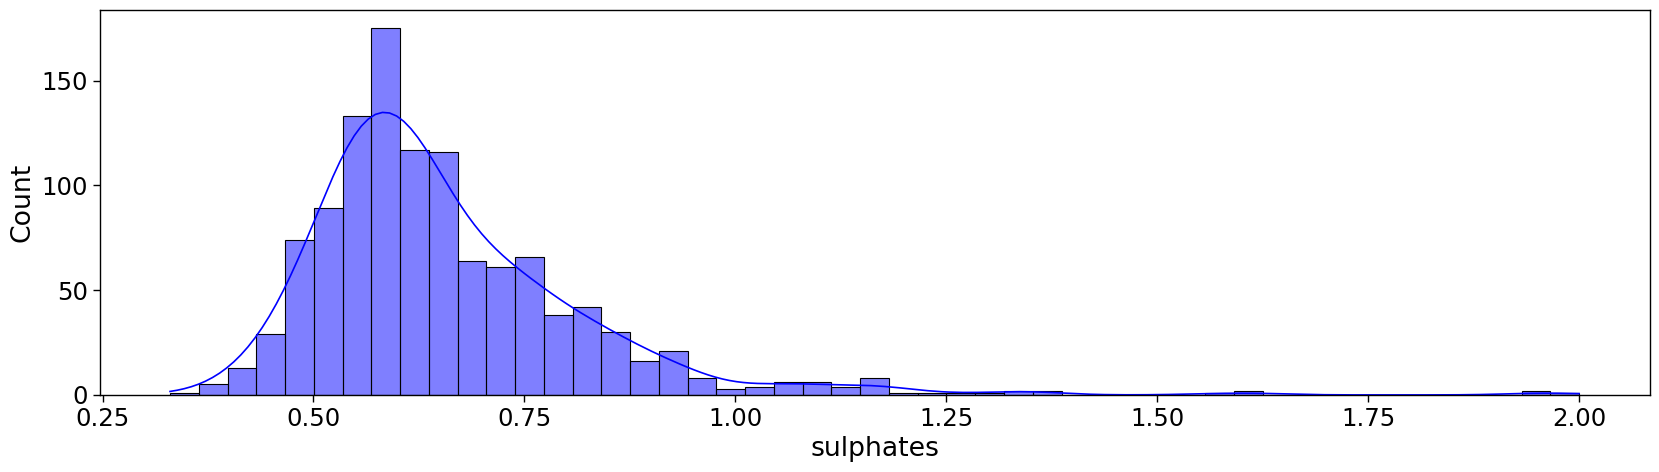

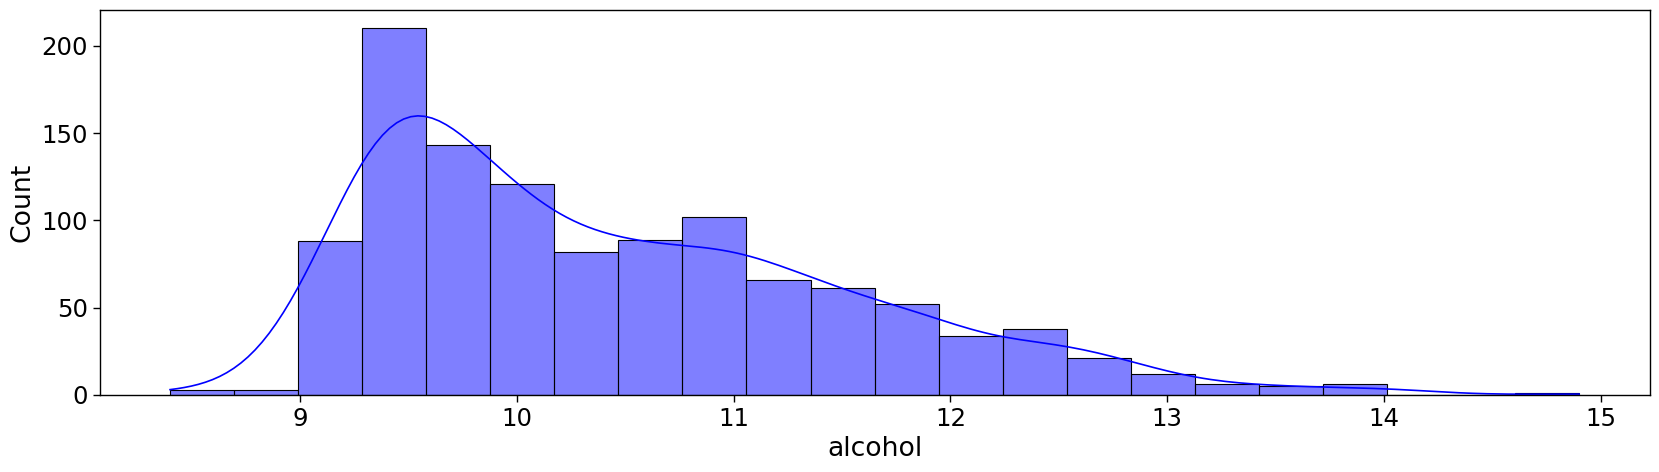

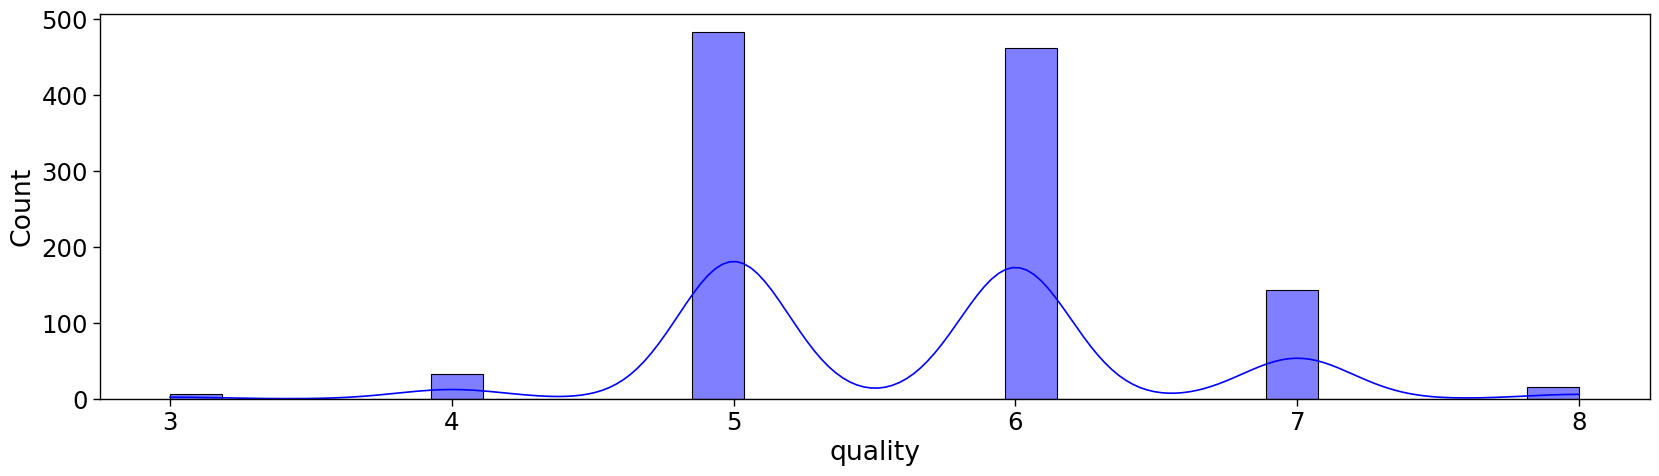

In [9]:
# Print out plots of each variable (column header) along with 
# KDE superimposed
for variable in wine_variables:
    sns.set_context("paper", font_scale=2)
    plt.figure(figsize=(20, 5))
    sns.histplot(df[variable],color='blue',kde=True)
    #plt.show()

## Probability distributions of variables

The method to determine the probability distributions will be as follows:
1. Plot a histogram of the variables data
2. Determine the likely probability distributions using the ***Fitter*** library
3. Determine the best method by using 'sum squared error' on the likely distributions
4. Use the generated parameters to generate synthetic data for the variable
5. Check that the generated synthetic data has the same probability distribution as the variable.
6. Append the checked, synthesised data to a dataframe 

The synthetic data generated will be approximately equal in number to the 'real' data - 1143 rows.
The reasoning behind this is that machine learning models typically seperate the data from anywhere in the range 50/25/25 to 75/15/10 - so double the amount of original data should be ample for any developments.

For naming of synthesised variables, it will be the initial of the variable followed by *_synth* to denote that it's the synthesised variable.

## Fixed acidity

Analyse the *fixed acidity* variable and determine it's probability distribution using the 'Fitter' library

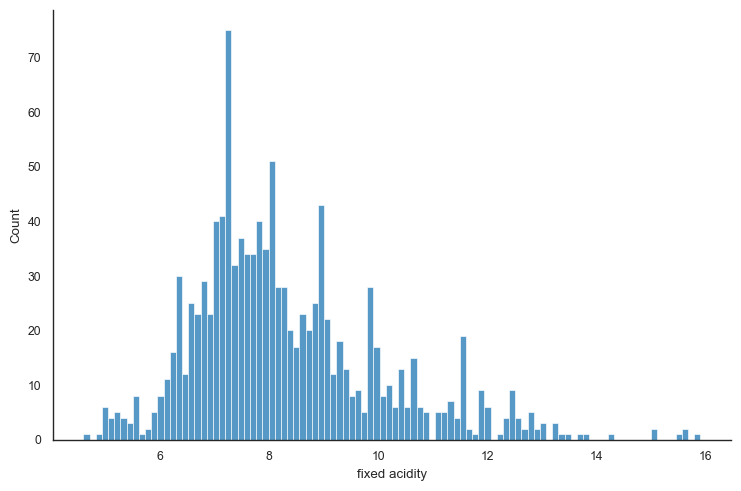

In [10]:
# Plot histograms of the data
sns.set_style('white')
sns.set_context("paper", font_scale=1)
sns.displot(data=df, x="fixed acidity", kind="hist", bins=100, aspect=1.5)

Determine the probability distribution using the 'Fitter' library.<br>
The values from the first column will be passed through the library (see below):

Fitting 10 distributions: 100%|████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 27.79it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,0.282317,678.293554,-9472.788689,inf,0.050560,5.592020e-03
chi2,0.299474,686.607150,-9405.354595,inf,0.057939,8.906417e-04
gamma,0.299475,686.607061,-9405.353280,inf,0.057939,8.905541e-04
cauchy,0.345093,681.612823,-9250.335602,inf,0.109318,2.373896e-12
rayleigh,0.386282,inf,-9121.456926,inf,0.152453,1.164303e-23


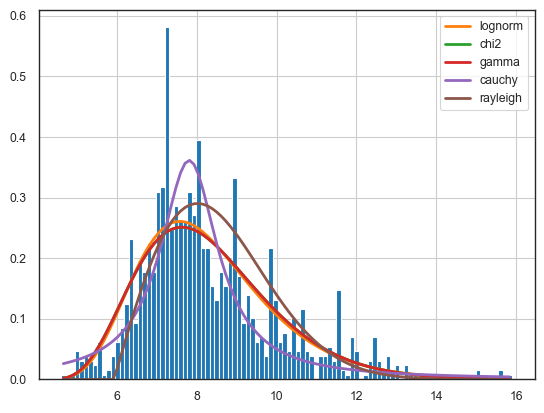

In [11]:
fixedAcidity = df["fixed acidity"].values
f = Fitter(fixedAcidity,
           distributions=get_common_distributions())
f.fit()
f.summary()

In [12]:
# Get the best distribution using sum squared error.
f.get_best(method = 'sumsquare_error')

{'lognorm': {'s': 0.3111165908311433,
  'loc': 2.894249875615288,
  'scale': 5.159301783923943}}

In [13]:
# Reminder about the variables from the first column:
# Get kurtosis, skew and variance
kurt = df["fixed acidity"].kurt()
print(f'Kurtosis is :\n{kurt}')

std_fa = df["fixed acidity"].std()
print(f'\nThe standard deviation is: \n{std_fa}')

var_fa = (std_fa)**2 
print(f'\nThe variance is: \n{var_fa}')

skew_fa = df["fixed acidity"]
print(f'\nThe skew is: \n{skew_fa.skew()}')

mean_fa = df["fixed acidity"].mean()
print(f'\nThe mean is: \n{mean_fa}')

Kurtosis is :
1.3846135487241824

The standard deviation is: 
1.747595017169539

The variance is: 
3.054088344035801

The skew is: 
1.0449299563724053

The mean is: 
8.311111111111119


### Synthesised data: fixed acidity

Now that the probability distribution is known, data can be synthesised with the identical probability distribution of the fixed acidity data and the same number of data points (1143).

In [14]:
# reminder of original variable.
fa = df["fixed acidity"].describe()
fa

count    1143.000000
mean        8.311111
std         1.747595
min         4.600000
25%         7.100000
50%         7.900000
75%         9.100000
max        15.900000
Name: fixed acidity, dtype: float64

mean: 8.3111
std:  1.7476


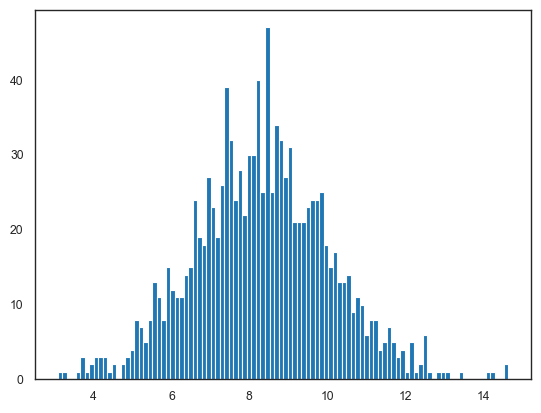

In [15]:
# fa_synth is the fixed acidity, synthesised data
fa_synth = lognorm.rvs(0.025, 0, 1, size=1143)

# standardisation to get mean = 0, std = 1
fa_synth = (fa_synth - np.mean(fa_synth)) / np.std(fa_synth)

# get desired mean + std
fa_synth = (fa_synth * std_fa) + mean_fa

plt.hist(fa_synth, bins=100)
print(f"mean: {np.mean(fa_synth):.4f}")
print(f"std:  {np.std(fa_synth):.4f}")

Check generated data matches the original probability distribution:

Fitting 10 distributions: 100%|████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 29.28it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,0.064338,670.842015,-11163.145851,inf,0.016227,0.919313
gamma,0.064358,671.024981,-11162.802955,inf,0.016184,0.920814
norm,0.064467,675.111027,-11167.895074,inf,0.020192,0.731938
chi2,0.069728,662.315515,-11071.198582,inf,0.032079,0.186096
exponpow,0.139722,711.488395,-10276.744229,inf,0.065540,0.000103


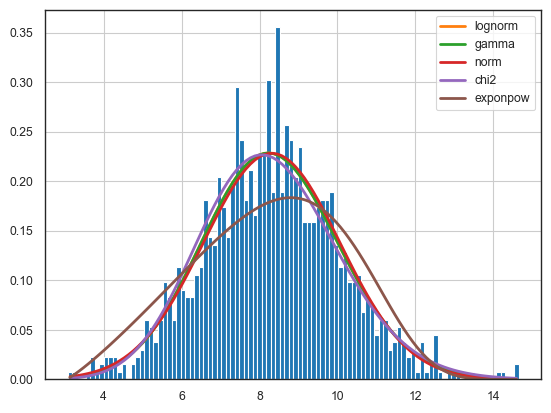

In [16]:
f = Fitter(fa_synth,
           distributions=get_common_distributions())
f.fit()
f.summary()

And so we can see that the synthesised data has the same probability distribution as the original and so we can expect similar behaviours when analysing the variable.<br>

### Append data

Now we need to create a new dataframe and insert the synthesised data into it.

In [17]:
df2 = pd.DataFrame(fa_synth)
print(df2)

              0
0      9.061492
1      7.004079
2      6.610133
3      5.635510
4     11.571060
...         ...
1138   8.517291
1139  10.843840
1140   7.581098
1141   8.169416
1142   9.843430

[1143 rows x 1 columns]


In [18]:
# Change the data type of the col header to string so that it can be edited.
df2.columns = df2.columns.astype("str")

df2.rename(columns = {"0":"Fixed Acidity"}, inplace = True)
print(df2)

      Fixed Acidity
0          9.061492
1          7.004079
2          6.610133
3          5.635510
4         11.571060
...             ...
1138       8.517291
1139      10.843840
1140       7.581098
1141       8.169416
1142       9.843430

[1143 rows x 1 columns]


Now the process is continued with each variable, determinining the probability distribution and generating data to match the distribution.

## Volatile acidity

Analyse the Volatile Acidity variable and determine it's probability distribution using the 'Fitter' library

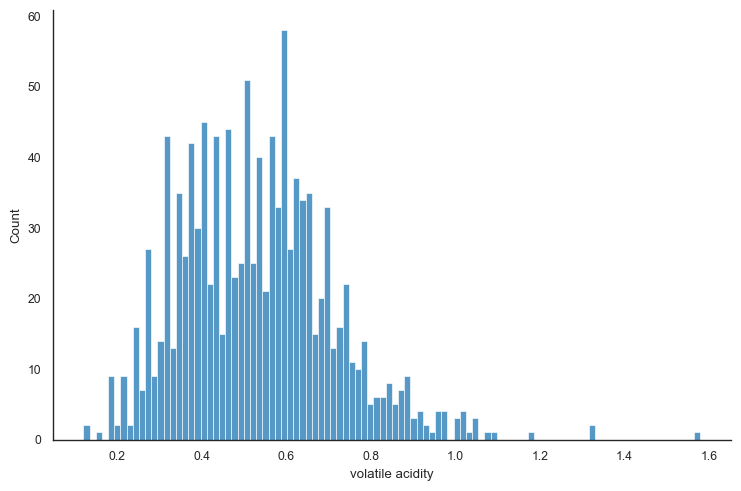

In [19]:
# Plot histograms of the data
sns.set_style('white')
sns.set_context("paper", font_scale=1)
sns.displot(data=df, x="volatile acidity", kind="hist", bins=100, aspect=1.5)

Use the Fitter library to determine the probability distribution:

Fitting 10 distributions: 100%|████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 45.03it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
chi2,16.189125,440.245925,-4844.709025,inf,0.043578,2.527282e-02
gamma,16.189127,440.246068,-4844.708847,inf,0.043577,2.527335e-02
lognorm,16.332038,424.769135,-4834.663216,inf,0.045014,1.887108e-02
norm,16.567258,710.219431,-4825.360095,inf,0.050588,5.555206e-03
exponpow,22.802897,899.257191,-4453.176758,inf,0.085841,8.912493e-08


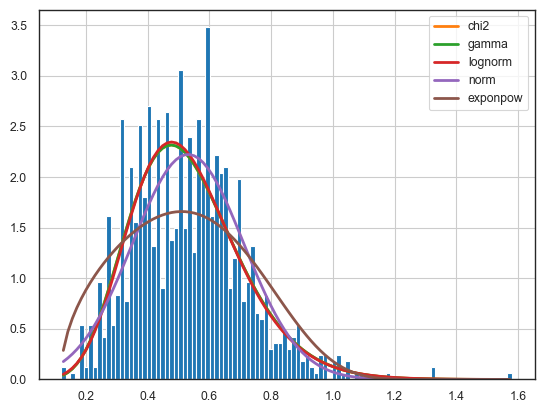

In [20]:
volatileAcidity = df["volatile acidity"].values
f = Fitter(volatileAcidity,
           distributions=get_common_distributions())
f.fit()
f.summary()

In [21]:
# Get the best distribution using sum squared error.
f.get_best(method = 'sumsquare_error')

{'chi2': {'df': 21.28150456047614,
  'loc': -0.05406603530302846,
  'scale': 0.02750766899560908}}

However, as the chi squared distribution is used to measure the fit between an observed distribution and a theoretical one, the gamma distribution will be used instead to synthesise the data.<br>
The reason behind this is if one was to look at the ***sumsquare_error*** column above, it can be seen that there is just 0.000002 of a difference between the chisquare and the gamma distribution.

In order to determine the shape and scale parameters for the gamma distribution, the mean ($\mu$) and the standard deviation ($\sigma$) are needed.

Shape = $\frac{\mu^2}{\sigma^2}$ 

Scale = $\frac{\sigma^2}{\mu}$

These values were obtained in [Basic statistics](#Basic-statistics) in the early stages of exploratory data analysis of this notebook.

### Synthesised data: Volatile acidity

In [22]:
# Reminder of the statistics of the original variable.
df["volatile acidity"].describe()

count    1143.000000
mean        0.531339
std         0.179633
min         0.120000
25%         0.392500
50%         0.520000
75%         0.640000
max         1.580000
Name: volatile acidity, dtype: float64

In [23]:
mean_va, std_va = 0.5313, 0.1796
shape = (mean_va**2) / (std_va**2)
scale = (std_va**2)/mean_va
print(f'The shape is: {shape}')
print(f'The scale is: {scale}')

The shape is: 8.751187060084025
The scale is: 0.06071176359872013


mean: 0.5313
std:  0.1796


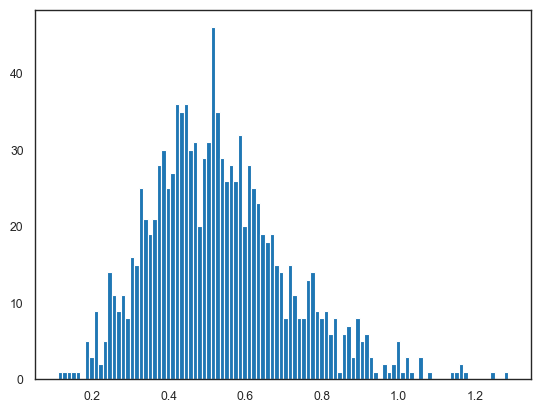

In [24]:
# Generate a random gamma distribution using the shape and scale
va_synth = np.random.gamma(shape, scale, 1143)

# standardisation to get mean = 0, std = 1
va_synth = (va_synth - np.mean(va_synth)) / np.std(va_synth)

# get desired mean + std
va_synth = (va_synth * std_va) + mean_va

plt.hist(va_synth, bins=100)
print(f"mean: {np.mean(va_synth):.4f}")
print(f"std:  {np.std(va_synth):.4f}")

In [25]:
va_synth_min = np.min(va_synth)
va_synth_max = np.max(va_synth)
print(f'The min is : {va_synth_min}')
print(f'The max is : {va_synth_max}')

The min is : 0.11013842345389718
The max is : 1.2883952828580365


Fitting 10 distributions: 100%|████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 49.13it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,5.590322,218.238045,-6060.064090,inf,0.014178,9.731964e-01
gamma,5.714093,222.935656,-6035.033989,inf,0.017152,8.838639e-01
chi2,5.714096,222.935423,-6035.033332,inf,0.017152,8.838600e-01
norm,9.202720,290.474816,-5497.363210,inf,0.052954,3.166431e-03
rayleigh,15.211050,inf,-4922.979380,inf,0.113892,2.265289e-13


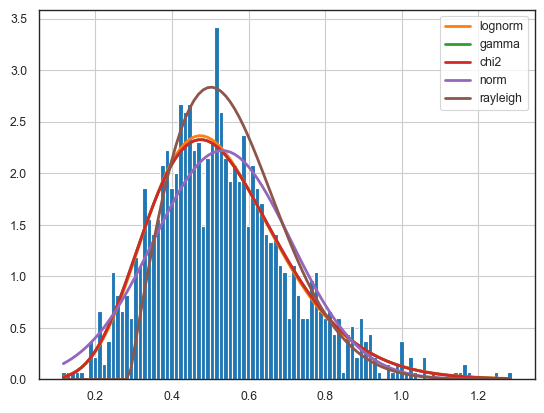

In [26]:
f = Fitter(va_synth,
           distributions=get_common_distributions())
f.fit()
f.summary()

The data has been synthesised, and it's probability distribution matches that of the original data, the next stage is to append the data to the new dataframe.

### Append data

In [27]:
# The new dataframe with the synthetic data for 'Fixed Acidity' added.
df2

,Fixed Acidity
0,9.061492
1,7.004079
2,6.610133
3,5.635510
4,11.571060
...,...
1138,8.517291
1139,10.843840
1140,7.581098
1141,8.169416


In [28]:
# Add a new column name, assign list of values 
# and append to dataframe
df2['Volatile Acidity'] = va_synth
df2

,Fixed Acidity,Volatile Acidity
0,9.061492,0.496295
1,7.004079,0.897029
2,6.610133,0.895610
3,5.635510,0.463164
4,11.571060,0.332938
...,...,...
1138,8.517291,0.290135
1139,10.843840,0.426335
1140,7.581098,0.381009
1141,8.169416,0.324119


### Citric acid

Analyse the **citric acid** variable and determine it's probability distribution using the 'Fitter' library.

Fitting 10 distributions: 100%|████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 25.04it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
powerlaw,62.234366,47.153336,-3305.582183,inf,0.218465,2.224383e-48
exponpow,67.951074,141.976692,-3205.134682,inf,0.121447,3.775495e-15
expon,84.698511,113.546048,-2960.361667,inf,0.143797,4.355640e-21
gamma,94.673607,163.501381,-2826.061788,inf,0.237984,1.922040e-57
rayleigh,99.797291,163.624965,-2772.860507,inf,0.087014,5.592465e-08


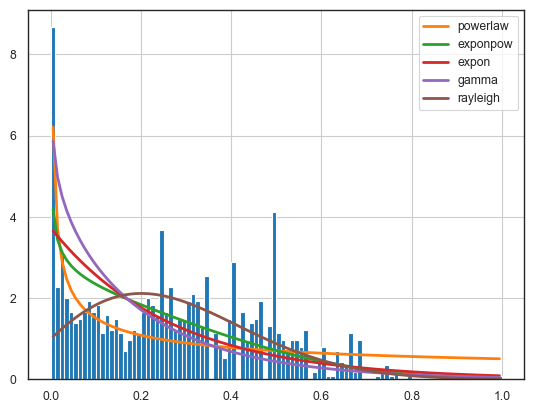

In [29]:
citricAcid = df["citric acid"].values
f = Fitter(citricAcid,
           distributions=get_common_distributions())
f.fit()
f.summary()

In [30]:
# Get the best distribution using sum squared error.
f.get_best(method = 'sumsquare_error')

{'powerlaw': {'a': 0.5277051017328287,
  'loc': -7.501749543560782e-28,
  'scale': 1.0730563982022998}}

### Synthesised data: citric acid

In [31]:
# Reminder of statistics for original variable
df["citric acid"].describe()

count    1143.000000
mean        0.268364
std         0.196686
min         0.000000
25%         0.090000
50%         0.250000
75%         0.420000
max         1.000000
Name: citric acid, dtype: float64

In [32]:
# the value for the a parameter is from the 'fitter' library
a = 0.5277051017328287
samples = 1143
#ca_synth = np.random.power(a, samples)
#ca_synth
#plt.plot(ca_synth)

In [33]:
# Location and scale determined from the 'Fitter' analysis of the original variable
location = -7.501749543560782e-28
scale = 1.0730563982022998
ca_synth = powerlaw.rvs(a, loc=location, scale = scale, size=1143)

In [34]:
f = Fitter(r,
           distributions=get_common_distributions())
f.fit()
f.summary()

NameError: name 'r' is not defined

The probability distribution of the generated synthetic data matches that of the original data, so the next stage is to add a column to the dataframe with the new data.

### Append data

In [ ]:
# The new dataframe with the previous two variables added
df2

In [ ]:
df2['Citric Acid'] = ca_synth
df2

### Residual sugar

Analyse the **residual sugar** variable and determine it's probability distribution using the 'Fitter' library.

In [ ]:
# Reminder of statistics for original variable
df["residual sugar"].describe()

In [ ]:
residualSugar = df["residual sugar"].values
f = Fitter(residualSugar,
           distributions=get_common_distributions())
f.fit()
f.summary()

In [ ]:
# Get the best distribution using sum squared error.
f.get_best(method = 'sumsquare_error')

### synthesised data: residual sugar

In [ ]:
# Get the basic stats for residual sugar
df["residual sugar"].describe()

In [ ]:
std_rs = df["residual sugar"].std()
mean_rs = df["residual sugar"].mean()

In [ ]:
#resSug = mu + sigma * np.random.default_rng().standard_cauchy(1143)
resSug = cauchy.rvs(loc=0.07823790817297994, scale=0.009102579819038505, size=1143, random_state=None)

#Below is testing
# standardisation to get mean = 0, std = 1
resSug = (resSug - np.mean(resSug)) / np.std(resSug)

# get desired mean + std
resSug = (resSug * std_rs) + mean_rs

# truncate distribution so it plots well
#resSug = s[(s>0.9) & (s<15.5)]  

plt.hist(resSug, bins=150)
print(f"mean: {np.mean(resSug):.4f}")
print(f"std:  {np.std(resSug):.4f}")

In [ ]:
print(np.min(resSug))
print(np.max(resSug))

Clearly, you can't have negative values for sugar as it's a quantity. The minimum and maximum values for residual sugar are positive - so an alternative way of synthesising the data needs to be explored.<br>


Trying to change the data by applying log transformations and seeing if that can help.
The process will be: 
- log transform of original data
- determine probability
- generate data
- reverse the log transform to (in theory) get the data that matches cauchy distribution.

In [ ]:
# Testing using logs

In [ ]:
# Checking to see whether transforming the data using logs will change the probability distribution
residualSugar2 = df["residual sugar"].apply(np.log1p).values
print(np.min(residualSugar2))
print(np.max(residualSugar2))
#residualSugar2 = residualSugar2.values
f = Fitter(residualSugar2, distributions=get_common_distributions())
f.fit()
f.summary()

In [ ]:
# Above only works for lognormal distributions - as the Cauchy distribution is very skewed, 
# it doesn't seem to be working.

In [ ]:
# Trying sklearn to see if that does anything
from sklearn.preprocessing import MinMaxScaler

residualSugar2 = df["residual sugar"]

scaler=MinMaxScaler(feature_range=(0,1))

residualSugar2=scaler.fit_transform(np.array(residualSugar2).reshape(-1,1))


In [ ]:
f = Fitter(residualSugar2, distributions=get_common_distributions())
f.fit()
f.summary()

So log transformation doesn't make a difference - and in fact, through exploring (googling) log transformation only works for normal or variations of normal distributions (see reference).<br>

As the lognormal distribution is the next closest, that's what will now be used to generate synthetic data for the *residual sugar* variable.

In [ ]:
import fitter
residualSugar = df["residual sugar"].values
f = Fitter(residualSugar)
# Specify the range of distributions where lognormal is
f.distributions = f.distributions[64:66]
# Specify lognormal distribution
#f = Fitter(residualSugar,distributions=["lognormal"])
f.fit()
f.summary()

In [ ]:
# Get the best distribution using sum squared error.
f.get_best(method = 'sumsquare_error')

In [ ]:
# rs_synth is the residual sugar, synthesised data
#rs_synth = lognorm.rvs(0.025, 0, 1, size=1143)
rs_synth = np.random.lognormal(mean_rs, std_rs, 1143)

# standardisation to get mean = 0, std = 1
rs_synth = (rs_synth - np.mean(rs_synth)) / np.std(rs_synth)

# get desired mean + std
rs_synth = (rs_synth * std_rs) + mean_rs

plt.hist(rs_synth, bins=100)
print(f"mean: {np.mean(rs_synth):.4f}")
print(f"std:  {np.std(rs_synth):.4f}")

In [ ]:
f = Fitter(rs_synth,
           distributions=get_common_distributions())
f.fit()
f.summary()

In [ ]:
# Get min and max
print(np.min(rs_synth))
print(np.max(rs_synth))

Minimum and maximum values are within range as the standard deviation and mean were used.<br>

Now all that's left is appending the data to the dataframe.

### Append data

In [ ]:
# The new dataframe with the previous three variables added
df2

In [ ]:
df2['Residual Sugar'] = rs_synth
df2

### Chlorides

In [ ]:
chlorides = df["chlorides"].values
f = Fitter(chlorides,
           distributions=get_common_distributions())
f.fit()
f.summary()

As the distribution is the same as the previous variable (*residual sugar*) the lognormal distribution will be used to generate the synthetic data for the variable instead.

In [ ]:
residualSugar = df["chlorides"].values
f = Fitter(residualSugar)
# Specify the range of distributions where lognormal is
f.distributions = f.distributions[64:66]
# Specify lognormal distribution
#f = Fitter(residualSugar,distributions=["lognormal"])
f.fit()
f.summary()

In [ ]:
# Get the best distribution using sum squared error.
f.get_best(method = 'sumsquare_error')

### synthetic data: chlorides

In [ ]:
# reminder of the statistics from the original variable
df.chlorides.describe()

In [ ]:
std_c = df.chlorides.std()
mean_c = df.chlorides.mean()

In [ ]:
# c_synth is the chlorides, synthesised data
#c_synth = lognorm.rvs(0.025, 0, 1, size=1143)
c_synth = np.random.lognormal(mean_c, std_c, 1143)

# standardisation to get mean = 0, std = 1
c_synth = (c_synth - np.mean(c_synth)) / np.std(c_synth)

# get desired mean + std
c_synth = (c_synth * std_c) + mean_c

plt.hist(c_synth, bins=100)
print(f"mean: {np.mean(c_synth):.4f}")
print(f"std:  {np.std(c_synth):.4f}")

### Check the synthesised data

In [ ]:
f = Fitter(c_synth,
           distributions=get_common_distributions())
f.fit()
f.summary()

In [ ]:
# min and max values
print(np.min(c_synth))
print(np.max(c_synth))

As the probability distributions match, the next step is to append the data to the new dataframe.

### Append data: chlorides

In [ ]:
# What the existing data looks like:
df2

In [ ]:
# Add a new column name, assign list of values 
# and append to dataframe
df2['Chlorides'] = c_synth
df2

### Free sulfur dioxide

In [ ]:
freeSulfurDioxide = df["free sulfur dioxide"].values
f = Fitter(freeSulfurDioxide,
           distributions=get_common_distributions())
f.fit()
f.summary()

In [ ]:
# Get the best distribution using sum squared error.
f.get_best(method = 'sumsquare_error')

From the data above, using five decimal places, the chisquared distribution is equivalent to the Gamma distribution, so once again that will be used to generate the data.

In order to determine the shape and scale parameters for the gamma distribution, the mean ($\mu$) and the standard deviation ($\sigma$) are needed.

Shape = $\frac{\mu^2}{\sigma^2}$ 

Scale = $\frac{\sigma^2}{\mu}$

These values were obtained in [Basic statistics](#Basic-statistics) in the early stages of exploratory data analysis of this notebook.

In [ ]:
mean_fsd, std_fsd = 15.615486, 10.250486
shape = (mean_fsd**2) / (std_fsd**2)
scale = (std_fsd**2)/mean_fsd
print(f'The shape is: {shape}')
print(f'The scale is: {scale}')

### synthetic data: free sulfur dioxide

In [ ]:
df["free sulfur dioxide"].describe()

In [ ]:
# Generate a random gamma distribution using the values for 
# shape and scale above with the samples needed
# 
fsd_synth = np.random.gamma(shape, scale, 1143)

# standardisation to get mean = 0, std = 1
fsd_synth = (fsd_synth - np.mean(fsd_synth)) / np.std(fsd_synth)

# get desired mean + std
fsd_synth = (fsd_synth * std_fsd) + mean_fsd

plt.hist(fsd_synth, bins=100)
print(f"mean: {np.mean(fsd_synth):.4f}")
print(f"std:  {np.std(fsd_synth):.4f}")

### Check the synthesised data

In [ ]:
f = Fitter(fsd_synth,
           distributions=get_common_distributions())
f.fit()
f.summary()

In [ ]:
# min and max values
print(np.min(fsd_synth))
print(np.max(fsd_synth))

As the synthesised data matches the probability distribution of the original data, the next step is to append it to the new dataframe.

### Append data

In [ ]:
# What the existing data looks like:
df2

In [ ]:
# Add a new column name, assign list of values 
# and append to dataframe
df2['Free Sulfur Dioxide'] = fsd_synth
df2

### Total sulfur dioxide

In [ ]:
totalSulfurDioxide = df["total sulfur dioxide"].values
f = Fitter(totalSulfurDioxide,
           distributions=get_common_distributions())
f.fit()
f.summary()

In [ ]:
# Get the best distribution using sum squared error.
f.get_best(method = 'sumsquare_error')

The probability distribution for the ***total sulfur dioxide*** is the Gamma distribution and that's what will be used to generate synthetic data for that variable.

As with the previous variable, in order to determine the shape and scale parameters for the gamma distribution, the mean ($\mu$) and the standard deviation ($\sigma$) are needed.

Shape = $\frac{\mu^2}{\sigma^2}$ 

Scale = $\frac{\sigma^2}{\mu}$

These values were obtained in [Basic statistics](#Basic-statistics) in the early stages of exploratory data analysis of this notebook.

### synthesised data: total sulfur dioxide

In [ ]:
df["total sulfur dioxide"].describe()

In [ ]:
mean_tsd, std_tsd = df["total sulfur dioxide"].mean(), df["total sulfur dioxide"].std()
shape = (mean_tsd**2) / (std_tsd**2)
scale = (std_tsd**2)/mean_tsd
print(f'The shape is: {shape}')
print(f'The scale is: {scale}')

In [ ]:
# Generate a random gamma distribution using the values for 
# shape and scale above with the samples needed
# 
tsd_synth = np.random.gamma(shape, scale, 1143)

# standardisation to get mean = 0, std = 1
tsd_synth = (tsd_synth - np.mean(tsd_synth)) / np.std(tsd_synth)

# get desired mean + std
tsd_synth = (tsd_synth * std_tsd) + mean_tsd

plt.hist(tsd_synth, bins=100)
print(f"mean: {np.mean(tsd_synth):.4f}")
print(f"std:  {np.std(tsd_synth):.4f}")

In [ ]:
f = Fitter(tsd_synth,
           distributions=get_common_distributions())
f.fit()
f.summary()

In [ ]:
# min and max values
print(np.min(tsd_synth))
print(np.max(tsd_synth))

As the synthesised data for the ***total sulfur dioxide*** matches the original data, the next stage is to append the data to the new dataframe.

### Append data

In [ ]:
# Add a new column name, assign list of values 
# and append to dataframe
df2['Total Sulfur Dioxide'] = tsd_synth
df2

### Density

In [ ]:
density = df["density"].values
f = Fitter(density,
           distributions=get_common_distributions())
f.fit()
f.summary()

In [ ]:
# Get the best distribution using sum squared error.
f.get_best(method = 'sumsquare_error')

The lognormal distribution is the best-fitting probability distribution for the ***density*** variable.

### Synthesised data: density

In [ ]:
#reminder of the statistics for the column "density"
df.density.describe()

In [ ]:
std_d = df.density.std()
mean_d = df.density.mean()

In [ ]:
# fa_synth is the fixed acidity, synthesised data
d_synth = lognorm.rvs(0.025, 0, 1, size=1143)

# standardisation to get mean = 0, std = 1
d_synth = (d_synth - np.mean(d_synth)) / np.std(d_synth)

# get desired mean + std
d_synth = (d_synth * std_d) + mean_d

plt.hist(d_synth, bins=100)
print(f"mean: {np.mean(d_synth):.4f}")
print(f"std:  {np.std(d_synth):.4f}")

Now check the data

In [ ]:
f = Fitter(d_synth,
           distributions=get_common_distributions())
f.fit()
f.summary()

In [ ]:
# min and max values
print(np.min(d_synth))
print(np.max(d_synth))

As it's a lognormal distribution, the next stage is to append it to the dataframe that contains the rest of the synthesised data.

### Append data

In [ ]:
# Add a new column name, assign list of values 
# and append to dataframe
df2['Density'] = d_synth
df2

### pH

In [ ]:
pH = df["pH"].values
f = Fitter(pH,
           distributions=get_common_distributions())
f.fit()
f.summary()

In [ ]:
# Get the best distribution using sum squared error.
f.get_best(method = 'sumsquare_error')

The lognormal distribution is the best-fitting probability distribution for the ***pH*** variable, so that's what will be used to synthesise the data.

### Synthesised data: pH

In [ ]:
#reminder of the statistics for the column "pH"
df.pH.describe()

In [ ]:
std_pH = df.pH.std()
mean_pH = df.pH.mean()

In [ ]:
# fa_synth is the fixed acidity, synthesised data
pH_synth = lognorm.rvs(0.025, 0, 1, size=1143)

# standardisation to get mean = 0, std = 1
pH_synth = (pH_synth - np.mean(pH_synth)) / np.std(pH_synth)

# get desired mean + std
pH_synth = (pH_synth * std_pH) + mean_pH

plt.hist(pH_synth, bins=100)
print(f"mean: {np.mean(pH_synth):.4f}")
print(f"std:  {np.std(pH_synth):.4f}")

Check the synthesised data.

In [ ]:
f = Fitter(pH_synth,
           distributions=get_common_distributions())
f.fit()
f.summary()

In [ ]:
# min and max values
print(np.min(pH_synth))
print(np.max(pH_synth))

As the probability distributions and minimum and maximum values match, the next stage is to append the data.

### Append data

In [ ]:
# Add a new column name, assign list of values 
# and append to dataframe
df2['pH'] = pH_synth
df2

### Sulphates

In [ ]:
sulphates = df["sulphates"].values
f = Fitter(sulphates,
           distributions=get_common_distributions())
f.fit()
f.summary()

In [ ]:
# Get the best distribution using sum squared error.
f.get_best(method = 'sumsquare_error')

### Synthesised data: sulphates

In [ ]:
# Reminder of the basic statistics for the sulphates variable.
df.sulphates.describe()

In [ ]:
std_s = df.sulphates.std()
mean_s = df.sulphates.mean()

In [ ]:
# random.lognormal was used this time as the 
# probability distribution wasn't matching the original
s_synth = random.lognormal(mean=mean_s, sigma=std_s, size=1143)

# standardisation to get mean = 0, std = 1
s_synth = (s_synth - np.mean(s_synth)) / np.std(s_synth)

# get desired mean + std
s_synth = (s_synth * std_s) + mean_s

plt.hist(s_synth, bins=100)
print(f"mean: {np.mean(s_synth):.4f}")
print(f"std:  {np.std(s_synth):.4f}")

In [ ]:
f = Fitter(s_synth,
           distributions=get_common_distributions())
f.fit()
f.summary()

In [ ]:
# min and max values
print(np.min(s_synth))
print(np.max(s_synth))

As the probability distributions match, the next stage is to append the data to the new dataframe.

### Append data

In [ ]:
# Add a new column name, assign list of values 
# and append to dataframe
df2['Sulphates'] = s_synth
df2

### Alcohol

In [ ]:
alcohol = df["alcohol"].values
f = Fitter(alcohol,
           distributions=get_common_distributions())
f.fit()
f.summary()

In [ ]:
# Get the best distribution using sum squared error.
f.get_best(method = 'sumsquare_error')

### Synthesised data: alcohol

In [ ]:
# Reminder of the basic statistics for the alcohol variable.
df.alcohol.describe()

In [ ]:
std_a = df.alcohol.std()
mean_a = df.alcohol.mean()
std_a, mean_a

In [ ]:
a_synth = lognorm.rvs(s=0.4515,loc=8.067865,scale=2.1467, size=1143)

# standardisation to get mean = 0, std = 1
a_synth = (a_synth - np.mean(a_synth)) / np.std(a_synth)

# get desired mean + std
a_synth = (a_synth * std_a) + mean_a

plt.hist(a_synth, bins=100)
print(f"mean: {np.mean(a_synth):.4f}")
print(f"std:  {np.std(a_synth):.4f}")

In [ ]:
f = Fitter(a_synth,
           distributions=get_common_distributions())
f.fit()
f.summary()

In [ ]:
# min and max values
print(np.min(a_synth))
print(np.max(a_synth))

As the probability distributions match, the next stage is to append the data to the new dataframe.

### Append data

In [ ]:
df2['Alcohol'] = a_synth
df2

### Quality

From looking at [Visual summary of variables](#Visual-summary-of-variables), the variable **quality** is the only one that isn't a chemical compound, therefore the scoring or grading of the wines has been done manually and thus this variable shouldn't be run through a library to determine the probability distribution.

However, for the purpose of the exercise, I will run through the process.

It would be better to now see which variables are correlated with a better score or grade of wine.

In [ ]:
# run through the 'fitter' dataset
quality = df["quality"].values
f = Fitter(quality,
           distributions=get_common_distributions())
f.fit()
f.summary()

In [ ]:
quality = df["quality"].values
f = Fitter(quality)
# Specify the range of distributions where lognormal is
f.distributions = f.distributions[64:66]
# Specify lognormal distribution
#f = Fitter(residualSugar,distributions=["lognormal"])
f.fit()
f.summary()

In [ ]:
# Get the best distribution using sum squared error.
f.get_best(method = 'sumsquare_error')

### Synthesised data: quality

In [ ]:
# reminder of the original data
df.quality.describe()

In [ ]:
# standard deviation and mean
std_q = df.quality.std()
mean_q = df.quality.mean()

In [ ]:
# Synthesise the lognormal distribution for the 'quality' variable.
# Generate s
#s_gen_q = np.random.lognormal(mean_q, std_q, 1143)

q_synth = lognorm.rvs(s=std_q, loc=0.89515,scale=0.06999, size=1143)

# standardisation to get mean = 0, std = 1
q_synth = (q_synth - np.mean(q_synth)) / np.std(q_synth)

# get desired mean + std
q_synth = (q_synth * std_q) + mean_q

plt.hist(q_synth, bins=100)
print(f"mean: {np.mean(q_synth):.4f}")
print(f"std:  {np.std(q_synth):.4f}")

In [ ]:
f = Fitter(q_synth,
           distributions=get_common_distributions())
f.fit()
f.summary()

As the probability distributions match, the next stage is to append the data to the new dataframe.

### Append data

In [ ]:
df2['Quality'] = q_synth
df2

## Variables and quality

Now to look at quality in a bit more detail and see the variation across the dataset.

In [ ]:
#Define inputs and output
X=df.drop(['quality'],axis=1)
y=df['quality']
# Set the plot size
fig,ax=plt.subplots(figsize=(20,5))
# Title
ax.set_title('Quality across dataset', fontsize=15)
sns.countplot(x=y, palette='magma');

It can be see from above that the majority of wines are graded 5 and 6, whereas only very few (approx 25) are graded 8.

The next stage would be to plot the variables against quality to see if there's any correlation with quality - specifically, looking at the variables with respect to grades 7 and 8.

In [ ]:
# Remove 'quality' as quality vs. quality doesn't need to be plotted.
wine_variables.pop()

In [ ]:
# Print out plots of each variable (column header) along with 
# KDE superimposed
for variable in wine_variables:
    sns.set_context("paper", font_scale=2)
    plt.figure(figsize=(20, 5))
    sns.boxplot(x=df['quality'], y=df[variable], palette='magma')
    #plt.show()

### Observations of variables versus quality

Summarising the observations from the boxplots above (in particular at wines graded 7 or 8):
- Very low range of volatile acidity (8 has the lowest value and range).
- Citric acid higher overall in 7 and 8.
- Chlorides at the lowest level and tightest range for 8 (approx 0.75).
- Grade 8 wines have a lower overall value and tighter range for density.
- Grade 8 wines have the lowest pH and tightest range.
- Higher level of sulphates with grade 8 wines
- Alcohol at the highest level for grade (median approx. 12%)

### A different way to observe variables versus quality

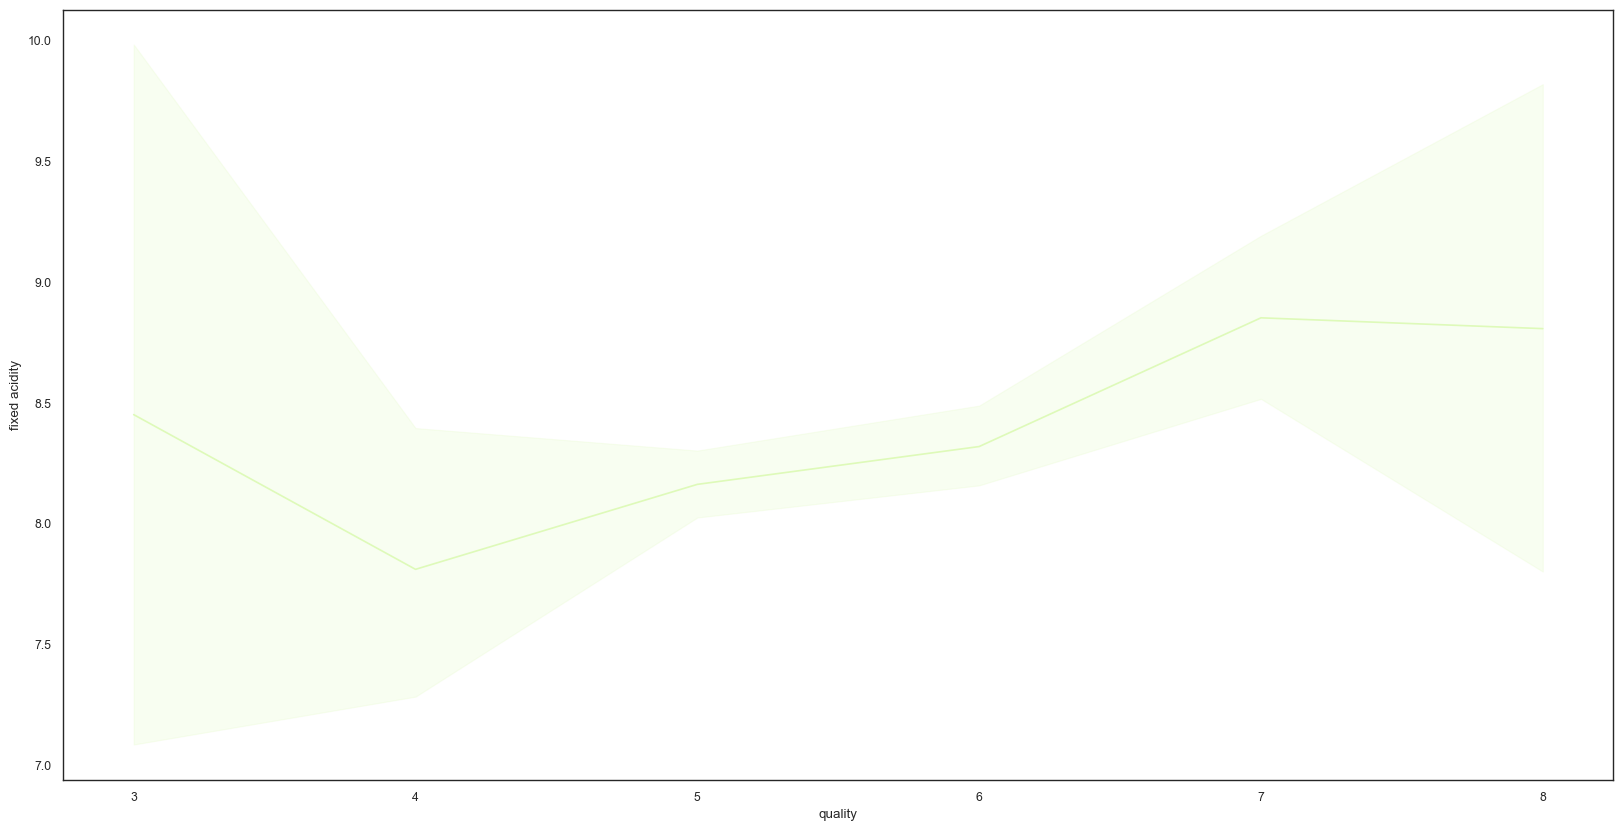

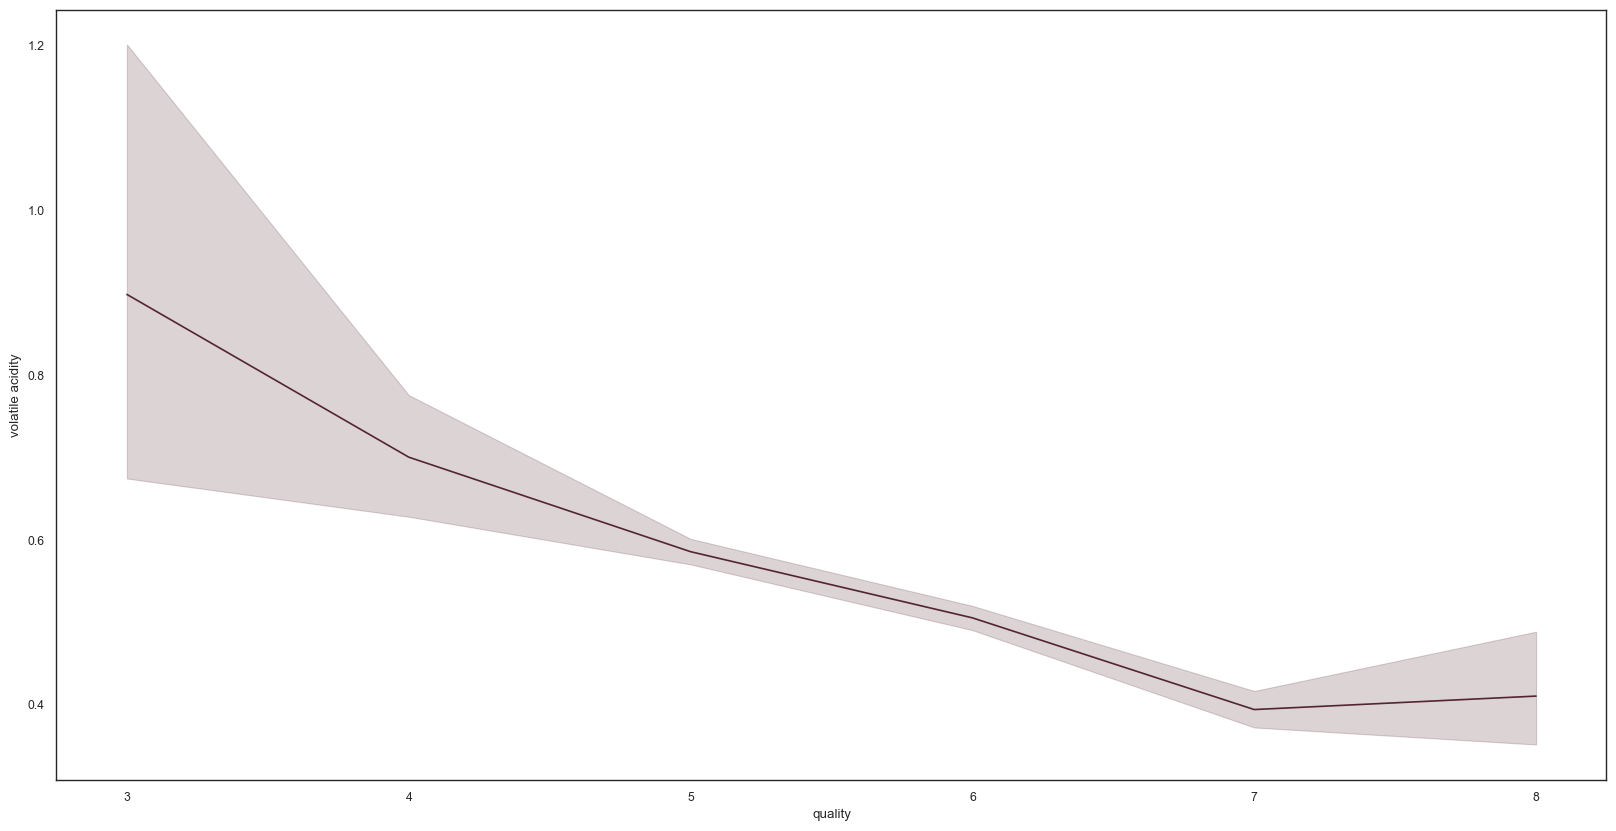

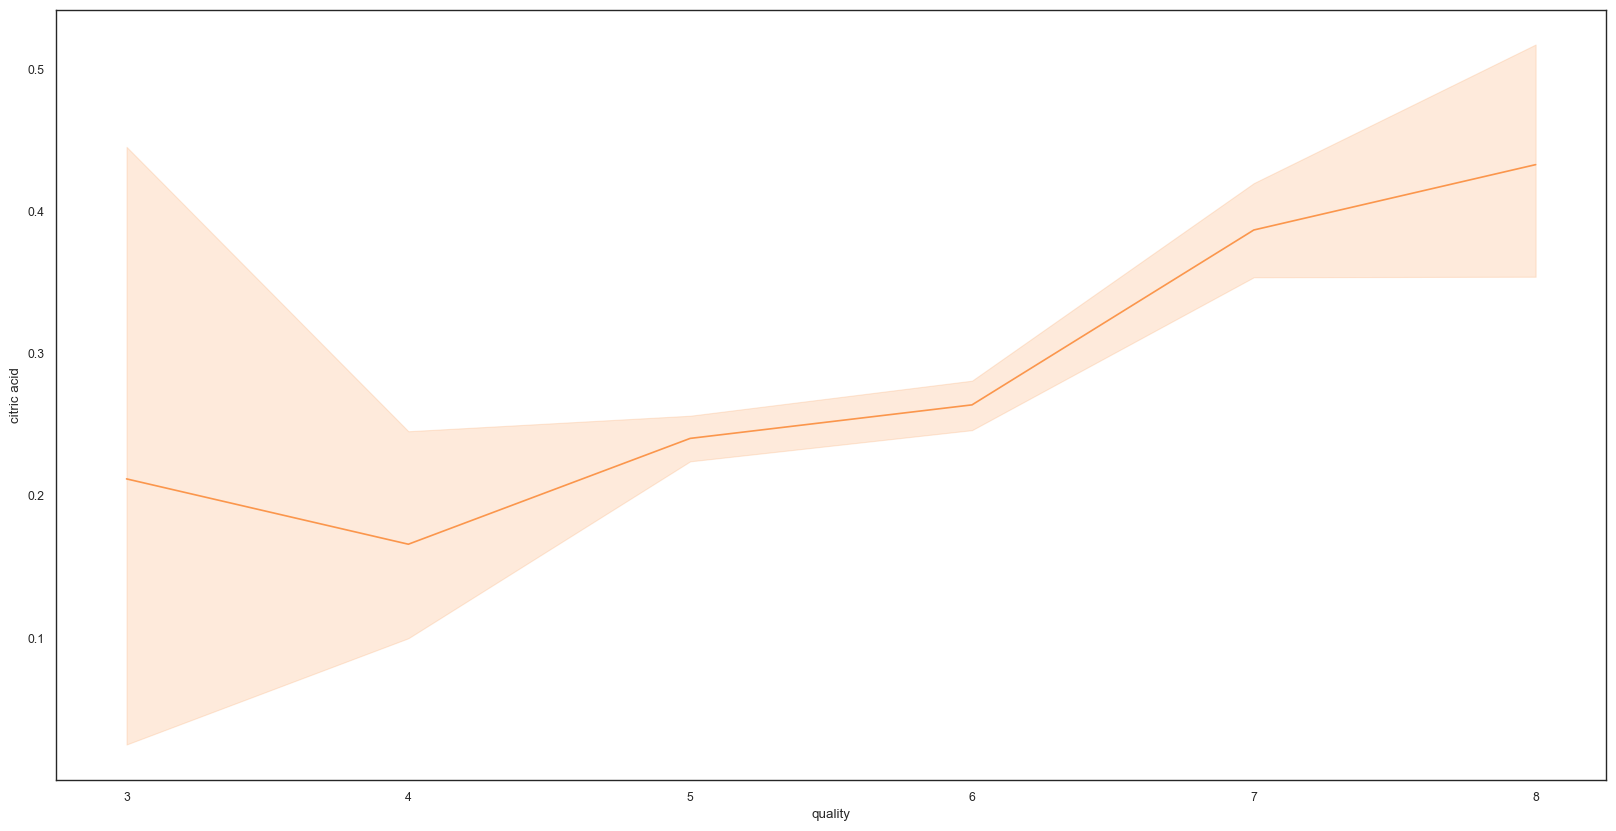

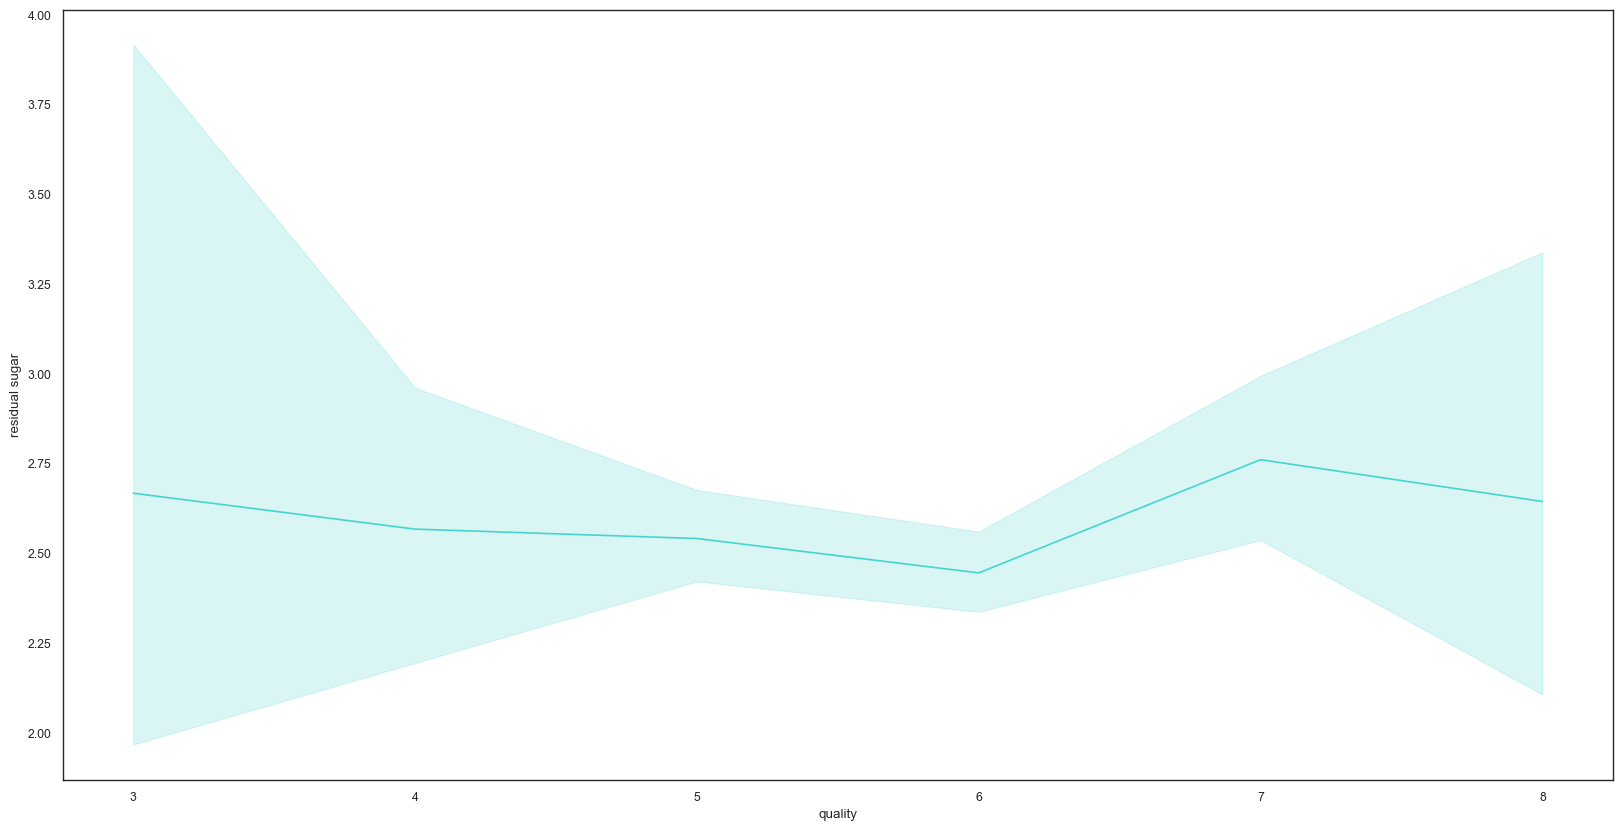

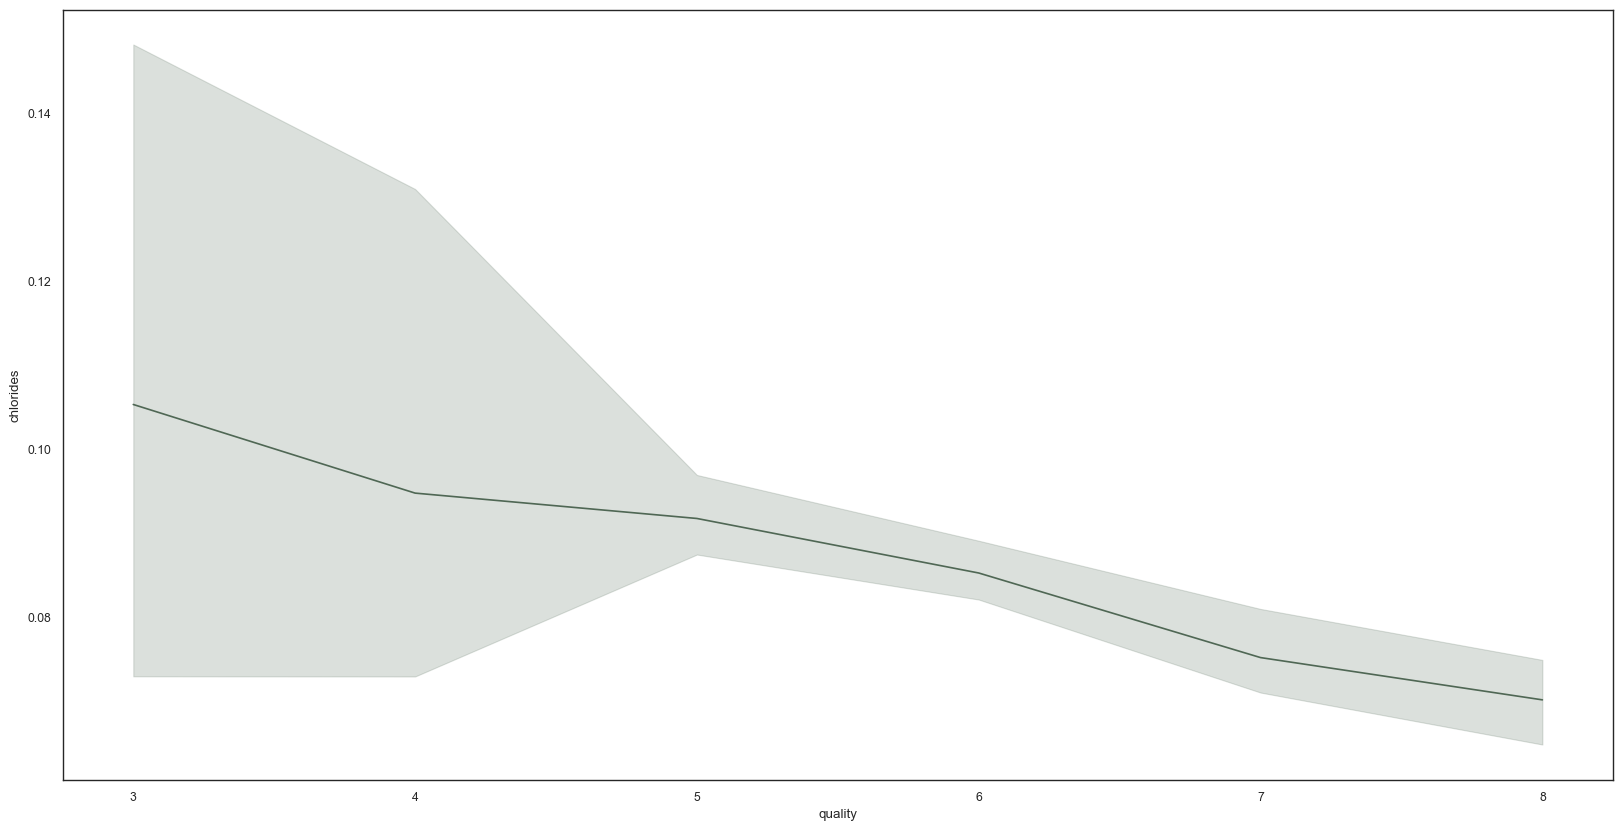

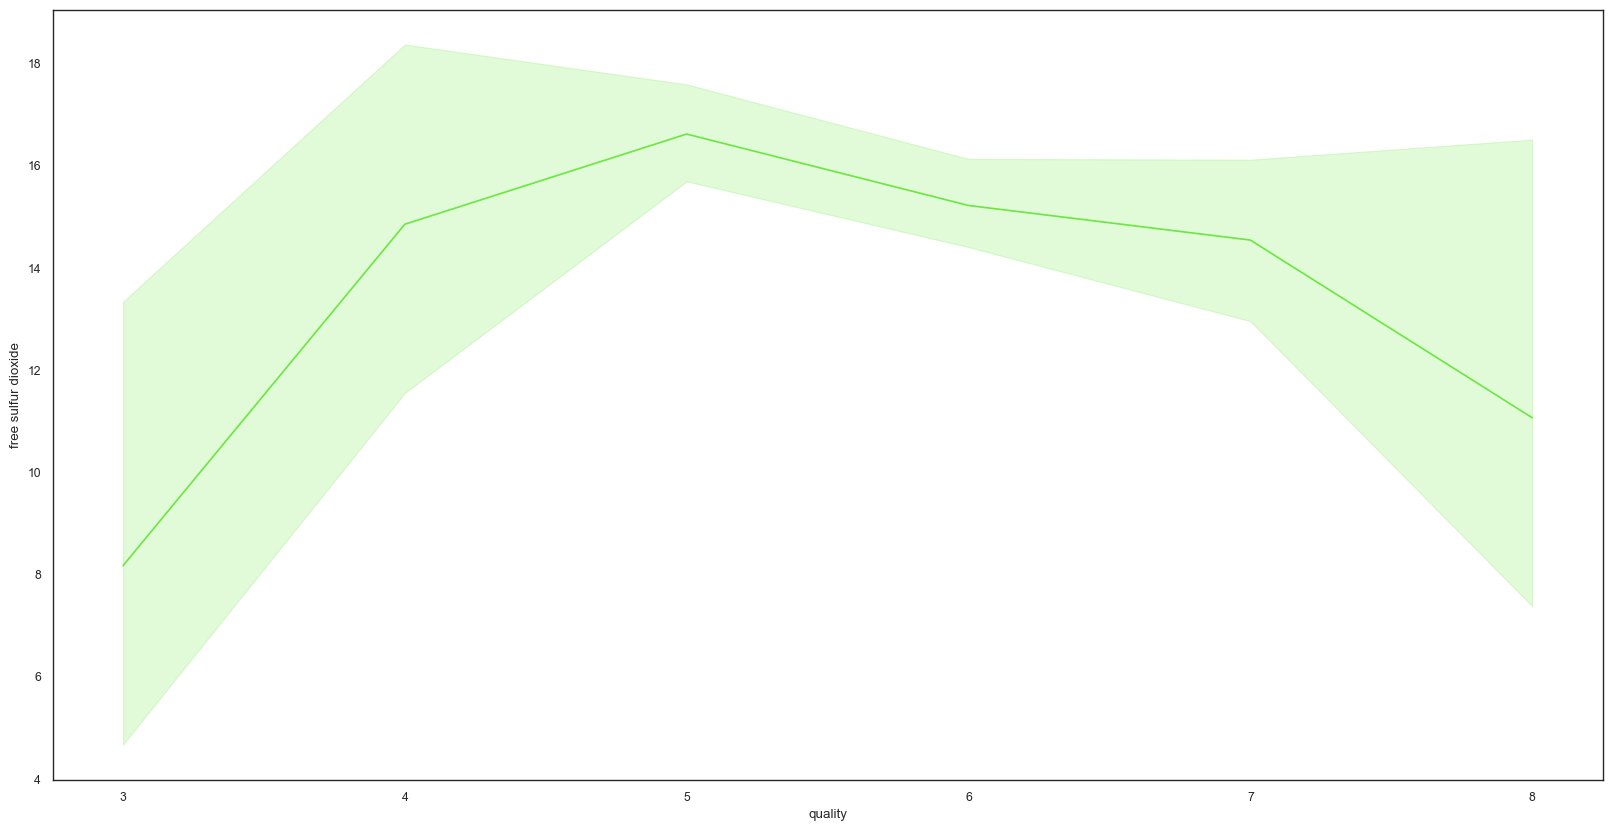

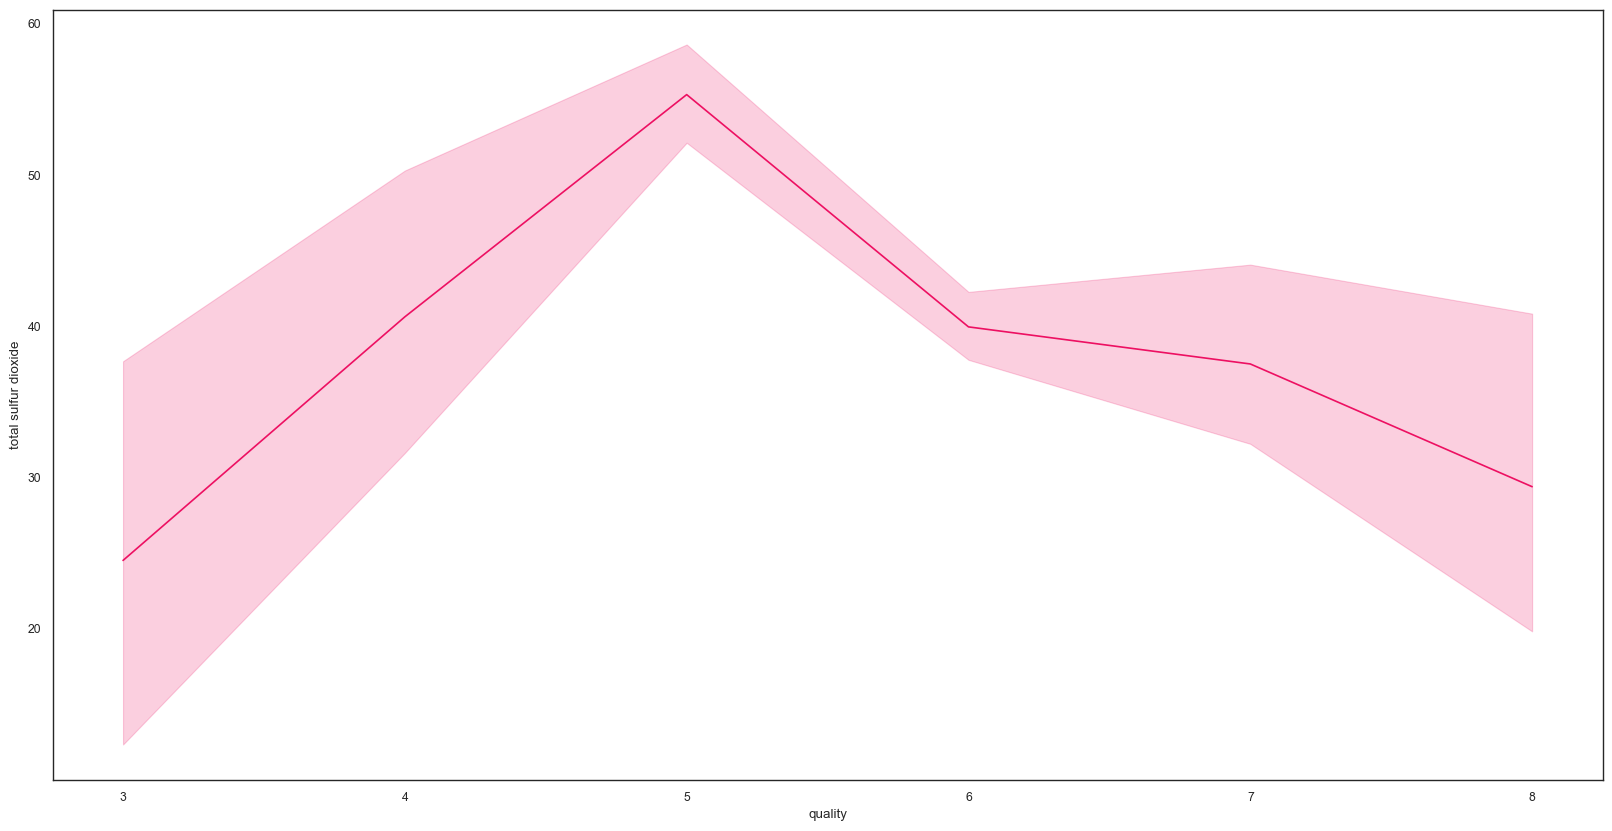

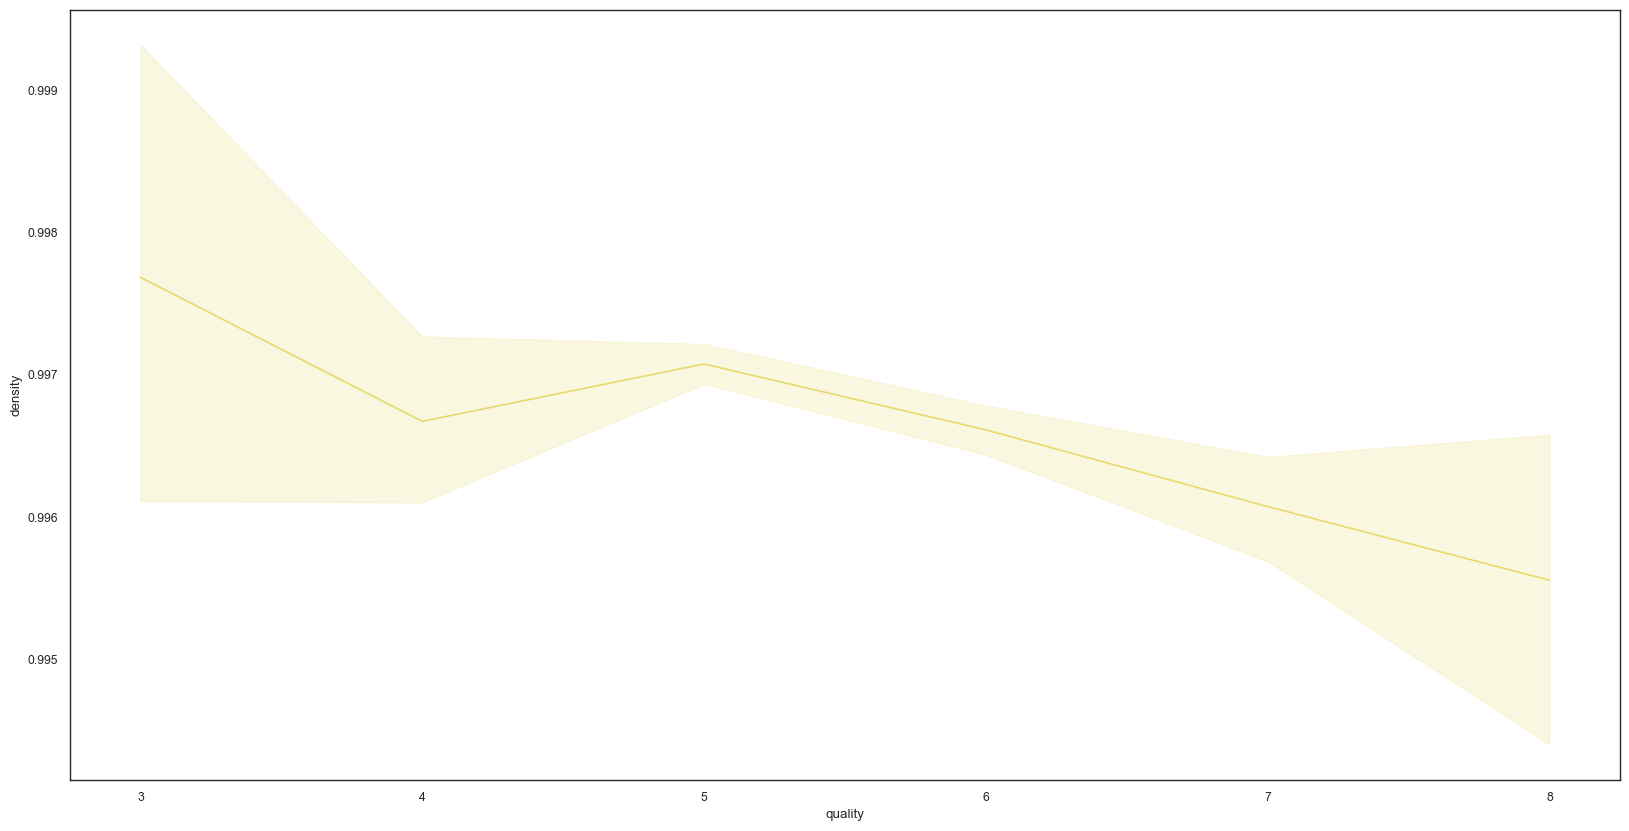

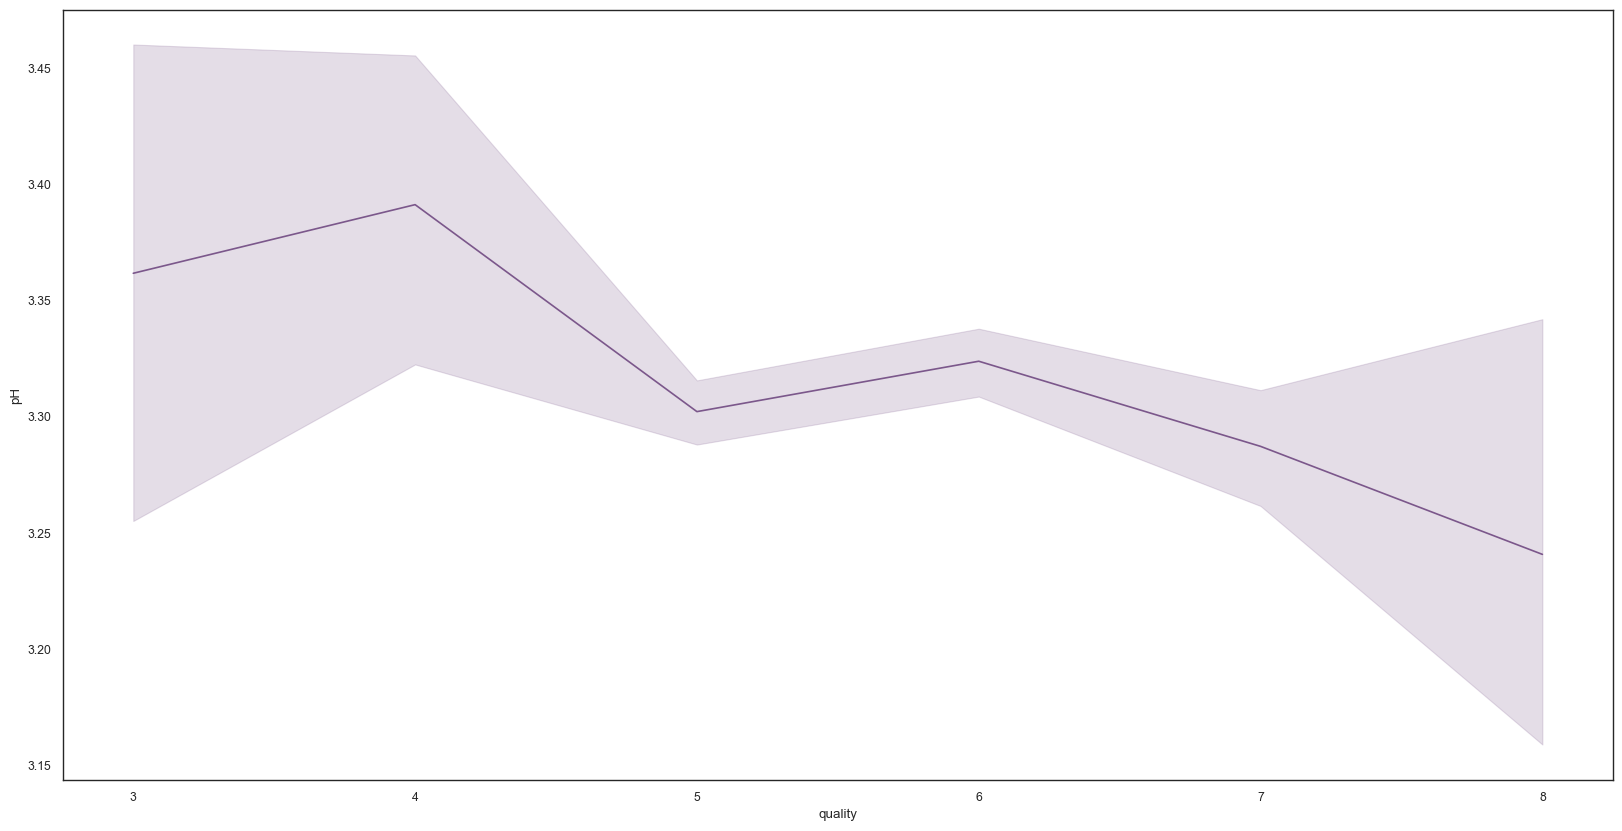

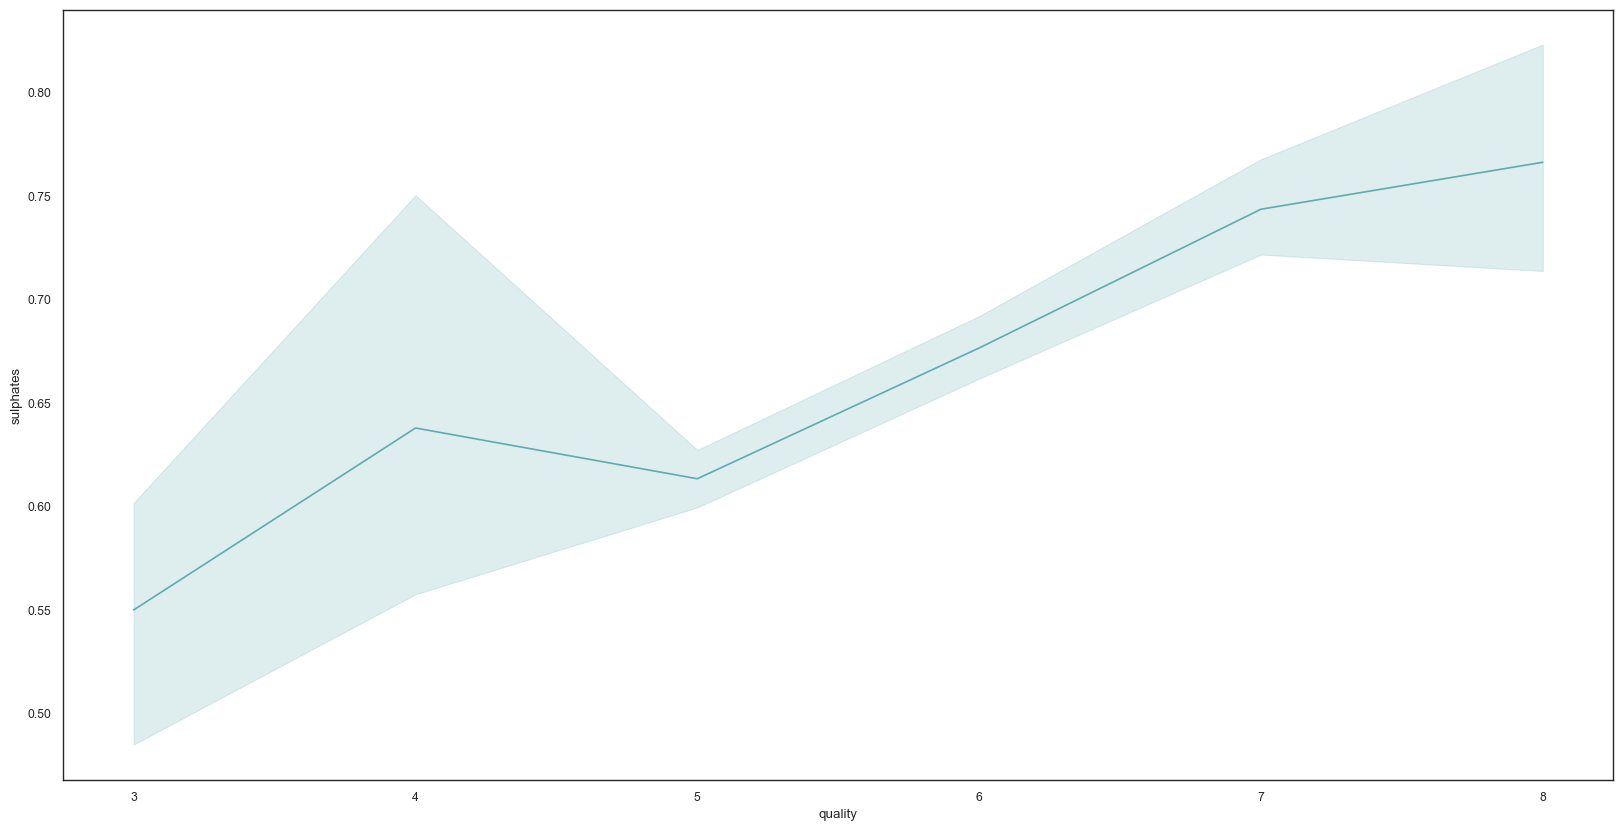

In [35]:
def randomcolor():
    r = random.random()
    b = random.random()
    g = random.random()
    rgb = [r,g,b]
    return rgb

for col in list(df.columns[:-2]):    
    plt.figure(figsize=(20,10))
    sns.lineplot(data=df, x="quality",y=col, color=randomcolor())
    plt.show()

### Correlations

Increases in the following variables correspond to an increase in quality (positive correlation):

- *Fixed acidity*
- *Citric acid* 
- *Sulphates*
- *Alcohol*

Decreases in the following variables correspond to an increase in quality (negative correlation):
- *Volatile acidity*
- *Chlorides*
- *Density* (below 0.996)
- *pH* (below 3.3)

### Correlation between variables and quality

If visualing the relationship between the variables and quality was undesired, then the correlation function in pandas could be used instead:

In [36]:
#correlation = train.corr()
print(df.corr()['quality'].sort_values(ascending = False),'\n')

quality                 1.000000
alcohol                 0.484866
sulphates               0.257710
citric acid             0.240821
fixed acidity           0.121970
residual sugar          0.022002
pH                     -0.052453
free sulfur dioxide    -0.063260
chlorides              -0.124085
density                -0.175208
total sulfur dioxide   -0.183339
volatile acidity       -0.407394
Name: quality, dtype: float64 



## Conclusion

This project started with exploratory data analysis (EDA) of the original data of the wine dataset, in order to determine:
- Number of variables
- Type of variables

The result of the the above showed that there were 11 variables that were chemical or physiochemical compounds, with the last column, *quality* being a measure of how good the wine actually was. That was determined manually, i.e a person, or more likely persons in this case, sampled 1443 red wines and gave the wine a score between 3 to 8, with 3 being the lowest and 8 being the highest.<br>

Following on from the EDA, a python library (*Fitter*) was used to determine the probability distribution of each variable, and then using the basic statistics determined from the EDA (mean, standard deviation etc) either numpy or scipy was used to generate synthetic data for the variable.
After the synthetic data was generated, it was run through *Fitter* again to determine whether the probability distributions matched. In addition, the minimum and maximum values were observed to see whether the data matched the input data.

In some cases(chi squared, cauchy), an alternative probability distribution was used to generate the data because:
1) the original probability distribution for the variable proved hard to generate (from reading the documentation and attempting)
2) When data was generated according to the original probability distribution and run through *Fitter* again, it determined that the probability distribution was a different type.

After the synthetic data was generated, it was back to reviewing the original data in order to determine what variables, if any, contributed to the quality of the wine.<br>
In this particular case, quality levels 7 and 8 were chosen for the simple reason that people want to drink the best wine that they can afford.<br>
If the description on the wine label could help the drinker make an educated guess as to the quality of wine by mentioning variables analysed in this notebook, then even better.<br>

From analysis of the variables, it would seem that four are positively correlated with quality and three negatively correlated.
To know these values 'in the wild' one would have to know grape variety, vineyards and wine-making regions quite well - something perhaps to be explored in a data set in the future!

## References

1. [Python Distfit package](https://pythonawesome.com/distfit-probability-density-fitting/)
2. [Definition of Generalised Extreme Value Distribution](https://en.wikipedia.org/wiki/Generalized_extreme_value_distribution)
3. [Definition of Beta Distribution](https://en.wikipedia.org/wiki/Beta_distribution)
4. [Definition of Exponential Distribution](https://en.wikipedia.org/wiki/Exponential_distribution)
5. [Python Fitter package](https://pypi.org/project/fitter/)
6. [Ways to use the describe() function](https://www.statology.org/pandas-describe/)
7. [Using Pandas to find Kurtosis](https://pythontic.com/pandas/dataframe-computations/kurtosis#:~:text=Kurtosis%20function%20in%20pandas%3A%201%20The%20pandas%20DataFrame,a%20normal%20distribution%20has%20a%20kurtosis%20of%200.)
8. [Performance comparison for column header lists](https://datatofish.com/list-column-names-pandas-dataframe/#:~:text=Here%20are%20two%20approaches%20to%20get%20a%20list,example%2C%20let%E2%80%99s%20create%20a%20DataFrame%20with%203%20columns%3A)
9. [Scipy lognormal distribution](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.lognorm.html?highlight=lognormal)
10. [Changing Column headers in pandas](https://medium.com/swlh/pandas-different-ways-of-formatting-column-headers-aec6889d1881)
11. [Generating lognormal data](https://stackoverflow.com/questions/68361048/how-to-generate-lognormal-distribution-with-specific-mean-and-std-in-python)
12. [The Chi Squared distribution](https://en.wikipedia.org/wiki/Chi-squared_distribution#:~:text=The%20chi-squared%20distribution%20is%20used%20in%20the%20common,a%20normal%20distribution%20from%20a%20sample%20standard%20deviation.)
13. [Adding a column in pandas](https://datascienceparichay.com/article/pandas-add-column-to-dataframe/#:~:text=Pandas%20%E2%80%93%20Add%20Column%20to%20Existing%20DataFrame%201,dataframe%20assign%20%28%29%20function%20...%204%20Summary%20)
14.[Definition of Gamma distribution](https://en.wikipedia.org/wiki/Gamma_distribution)
15.[How to determine the shape and scale for a gamma distribution](https://math.stackexchange.com/questions/2873763/is-it-possible-to-determine-shape-and-scale-for-a-gamma-distribution-from-a-mean#:~:text=If%20you%20know%20the%20mean%20is%20%CE%BC%20and,making%20the%20corresponding%20rate%20parameter%20%CE%BC%20%CF%83%202)
16. [Numpy's documentation to generate the Gamma distribution](https://numpy.org/doc/stable/reference/random/generated/numpy.random.gamma.html)
17. [Definition of Powerlaw distribution](https://en.wikipedia.org/wiki/Power_law)
18. [Numpy's documentation for powerlaw distribution](https://numpy.org/doc/stable/reference/random/generated/numpy.random.power.html)
19. [Definition of the Cauchy distribution](https://en.wikipedia.org/wiki/Cauchy_distribution)
20. [Pandas documentation - describe()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html)
21. [Pandas documentation - corr()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html)
22. [Why log transformation doesn't always work](https://datascience.stackexchange.com/questions/46763/why-does-not-log-transformation-make-the-data-normalized)
23. [Quantile Transformer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.QuantileTransformer.html)